## HOUSING: PRICE PREDICTION

### Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.

The company is looking at prospective properties to buy houses to enter the market. We are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:

- Which variables are important to predict the price of variable?
- How do these variables describe the price of the house?


#### Importing the required libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

#### Loading the train dataset:

In [2]:
df_train = pd.read_csv('Housing_train.csv')

# Looking at the train dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

#### Chceking for the shape of the train dataset:

In [3]:
df_train.shape

(1168, 81)

- The train dataset contains 1168 rows and 81 columns including the target column.
- "SalePrice" is the target column.

#### Loading the test dataset:

In [4]:
df_test = pd.read_csv("Housing_test.csv")

# Looking at the test dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

#### Checking the shape of the test dataset:

In [5]:
df_test.shape

(292, 80)

- There are total 292 rows and 80 columns in the test dataset.
- The test dataset does not contain the target column.

#### Checking for the columns of the train dataset:

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Columns description of Train Dataset:

- Id:

- MSSubClass: Identifies the type of dwelling involved in the sale.

- MSZoning: Identifies the general zoning classification of the sale.

- LotFrontage: Linear feet of street connected to property.

- LotArea: Lot size in square feet.

- Street: Type of road access to property.

- Alley: Type of alley access to property.

- LotShape: General shape of property.

- LandContour: Flatness of the property.

- Utilities: Type of utilities available.

- LotConfig: Lot configuration.

- LandSlope: Slope of property.

- Neighborhood: Physical locations within Ames city limits.

- Condition1: Proximity to various conditions.

- Condition2: Proximity to various conditions (if more than one is present).

- BldgType: Type of dwelling.

- HouseStyle: Style of dwelling.

- OverallQual: Rates the overall material and finish of the house.

- OverallCond: Rates the overall condition of the house.

- YearBuilt: Original construction date.

- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions).

- RoofStyle: Type of roof.

- RoofMatl: Roof material.

- Exterior1st: Exterior covering on house.

- Exterior2nd: Exterior covering on house (if more than one material).

- MasVnrType: Masonry veneer type.

- MasVnrArea: Masonry veneer area in square feet.

- ExterQual: Evaluates the quality of the material on the exterior.

- ExterCond: Evaluates the present condition of the material on the exterior.

- Foundation: Type of foundation.

- BsmtQual: Evaluates the height of the basement.

- BsmtCond: Evaluates the general condition of the basement.

- BsmtExposure: Refers to walkout or garden level walls.

- BsmtFinType1: Rating of basement finished area.

- BsmtFinSF1: Type 1 finished square feet.

- BsmtFinType2: Rating of basement finished area (if multiple types).

- BsmtFinSF2: Type 2 finished square feet.

- BsmtUnfSF: Unfinished square feet of basement area.

- TotalBsmtSF: Total square feet of basement area.

- Heating: Type of heating.

- HeatingQC: Heating quality and condition.

- CentralAir: Central air conditioning.

- Electrical: Electrical system.

- 1stFlrSF: First Floor square feet.
 
- 2ndFlrSF: Second floor square feet.

- LowQualFinSF: Low quality finished square feet (all floors).

- GrLivArea: Above grade (ground) living area square feet.

- BsmtFullBath: Basement full bathrooms.

- BsmtHalfBath: Basement half bathrooms.

- FullBath: Full bathrooms above grade.

- HalfBath: Half baths above grade.

- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

- Kitchen: Kitchens above grade

- KitchenQual: Kitchen quality

- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

- Functional: Home functionality (Assume typical unless deductions are warranted)

- Fireplaces: Number of fireplaces

- FireplaceQu: Fireplace quality

- GarageType: Garage location

- GarageYrBlt: Year garage was built
		
- GarageFinish: Interior finish of the garage

- GarageCars: Size of garage in car capacity

- GarageArea: Size of garage in square feet

- GarageQual: Garage quality

- GarageCond: Garage condition

- PavedDrive: Paved driveway

- WoodDeckSF: Wood deck area in square feet

- OpenPorchSF: Open porch area in square feet

- EnclosedPorch: Enclosed porch area in square feet

- 3SsnPorch: Three season porch area in square feet

- ScreenPorch: Screen porch area in square feet

- PoolArea: Pool area in square feet

- PoolQC: Pool quality

- Fence: Fence quality

- MiscFeature: Miscellaneous feature not covered in other categories

- MiscVal: $ Value of miscellaneous feature

- MoSold: Month Sold (MM)

- YrSold: Year Sold (YYYY)

- SaleType: Type of sale

- SaleCondition: Condition of sale

- SalePrice: Selling price of the House.

###### Note: The columns of Test Dataset is same as of Train Dataset. Only difference is that the Train dataset contains the target column "SalePrice" but the Test dataset does not contain any target column.

### Let's look at the null values of the datasets:

In [7]:
# Checking the null values of the Train Dataset:

df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot:>

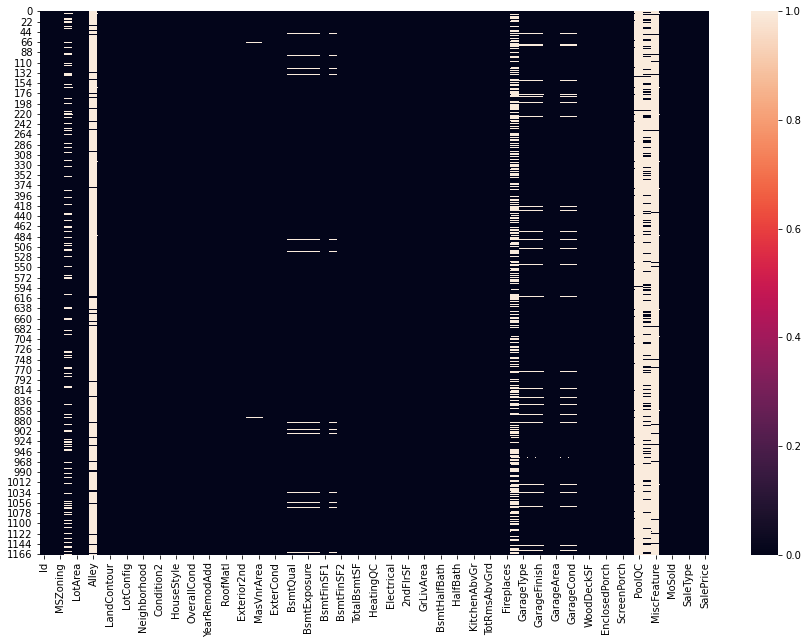

In [8]:
# Plotting heatmap to visualize the null values (missing values)

plt.figure(figsize=[15,10])
sns.heatmap(df_train.isnull())

- The following columns of the train dataset contains missing values:

1. LotFrontage
2. Alley
3. MasVnrType
4. MasVnrArea
5. BsmtQual
6. BsmtCond
7. BsmtExposure
8. BsmtFinType1
9. BsmtFinType2
10. FireplaceQu
11. GarageType
12. GarageYrBlt
13. GarageFinish
14. GarageQual
15. GarageCond
16. PoolQC
17. Fence
18. MiscFeature

- Note: We'll handle the missing values in further steps.

In [9]:
# Checking for the null values of test Dataset.

df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

<AxesSubplot:>

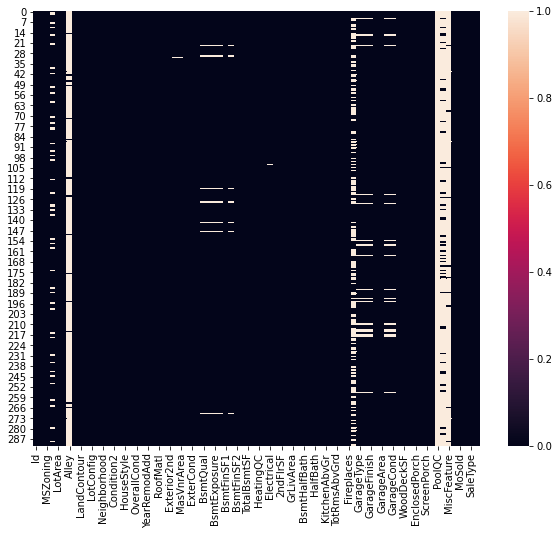

In [10]:
# Plotting heatmap to visualize the null values of the test dataset.

plt.figure(figsize=[10,8])
sns.heatmap(df_test.isnull())

- The following columns of the test dataset contains null values:

1. LotFrontage
2. Alley
3. MasVnrType
4. MasVnrArea
5. BsmtQual
6. BsmtCond
7. BsmtExposure
8. BsmtFinType1
9. BsmtFinType2
10. Electrical
11. FireplaceQu
12. GarageType
13. GarageYrBlt
14. GarageFinish
15. GarageQual
16. GarageCond
17. PoolQC
18. Fence
19. MiscFeature

- Note: We'll handle the missing values in the further steps.

In [11]:
# Checking for the datatypes of the Train dataset:

df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [12]:
# Checking for the datatype of the test dataset.

df_test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


#### Checking for the information of the Datasets:

In [13]:
# Checking for the informations of the Train Dataset: 

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

- Observations:

    - There are null values (missing values) in the dataset as said earlier.
    - The Train Dataset contains 80 feature columns and 1 target column.
    - 3 columns are of float datatype, 35 columns are of integer datatype and 43 columns are of object datatype.
    - The target column "SalePrice" is of integer datatype.

In [14]:
# Checking for the information of the Test Dataset

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

- Observations:

    - There are missing values in the Test Dataset as said earlier.
    - The Test Dataset contains 80 columns.
    - 4 columns are of float datatype, 34 columns are of interger datatype, and 42 columns are object datatype.
    - There is no target column in the Test Dataset.

#### Megering train and test datasets into a single dataset for better understandings:

In [15]:
df_train['Source'] = 'train'
df_test['Source'] = 'test'
df = pd.concat([df_train,df_test], ignore_index=True)

In [16]:
# Let's check for the merged dataset:

df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [17]:
# Checking for the shape of the merged dataset

df.shape

(1460, 82)

In [18]:
# Checking for numerical and categorical features.

numerical = df.select_dtypes(include=[np.number]).columns
categorical = df.select_dtypes(include=[np.object]).columns

In [19]:
# Checking for the numerical feature columns and categorical columns

print('The numerical features are: \n ', numerical, '\n ', '-'*80, '\n The categorical features are: \n ', categorical)

The numerical features are: 
  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 
  -------------------------------------------------------------------------------- 
 The categorical features are: 
  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'M

In [20]:
# Checking for the missing values again

df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### Handling the missing values:

###### 1. PoolQC (Pool Quality)

We can see that most of the rows of the column "PoolQC" is empty so we're considering the empty values as there is no pool available in the house. So, we're filling the null values with 'NA'

In [21]:
# Checking for the values counts of the column "PoolQC"

df['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [22]:
# Replacing the null values with 'NA'

df['PoolQC'].fillna('NA', inplace=True)

###### 2. MiscFeature (Miscellaneous feature not covered in other categories)

We can see that most of the rows of the column "MiscFeature" is empty so considering it as None we are replacing the missing values with 'NA'

In [23]:
# Checking for the value counts of the column "MiscFeature"

df['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [24]:
# Replacing the null values with 'NA'

df['MiscFeature'].fillna('NA', inplace=True)

###### 3. Alley (Type of alley access to property)

We can see that in the case of alley column also most of the rows are empty. So considering it as no alley option was avaiable we're replacing the missing values with 'NA'

In [25]:
# Checking for the values counts of the column "Alley"

df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [26]:
# Replacing the null values with 'NA'

df['Alley'].fillna('NA', inplace=True)

###### 4. Fence (Fence quality)

From our observation we found that most of the rows are empty of Fence column also. So, we're replacing the missing values with 'NA' to show that no fence was available.


In [27]:
# Checking for the value counts

df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [28]:
# Replacing the empty rows with 'NA'

df['Fence'].fillna('NA', inplace=True)

###### 5. FireplaceQu (Fireplace quality)

In [29]:
# Checking for the values counts

df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

We're considering the empty values as no fireplace is avaiable & replacing the empty values with 'NA'.

In [30]:
# Replacing the empty values with NA

df['FireplaceQu'].fillna('NA', inplace=True)

###### 6. LotFrontage (Linear feet of street connected to property):

We'll replace the missing values of this column with the mean value.

In [31]:
# Checking for the mean value of the column 'LotFrontage'

df['LotFrontage'].mean()

70.04995836802665

In [32]:
# Replacing the missing values with the mean of the column.

df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

###### 7. GarageType (Garage location)

In [33]:
# Checking for the value counts:

df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Considering the Garage option is not avaiable for the houses that have empty rows for 'GarageType' column. So, we're replcing it with 'NA'

In [34]:
# Replacing the missing values with 'NA'

df['GarageType'].fillna('NA', inplace=True)

###### 8. GarageYrBlt (Year garage was built)

In [35]:
# Replacing the missing values with 'NA' to show that Garage is not avaiable

df['GarageYrBlt'].fillna('NA', inplace = True)

###### 9. GarageFinish (Interior finish of the garage)

In [36]:
# Checking for the value counts

df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [37]:
# Replacing the missing values with 'NA'  to show garage option is not available

df['GarageFinish'].fillna('NA', inplace=True)

###### 10. GarageQual (Garage quality)

In [38]:
# Replacing the missing values with 'NA' to show Garage is not available

df['GarageQual'].fillna('NA', inplace=True)

###### 11. GarageCond (Garage condition)

In [39]:
# Replacing the missing values with 'NA'

df['GarageCond'].fillna('NA', inplace=True)

###### 12. BsmtFinType2 (Rating of basement finished area (if multiple types))

In [40]:
# Replacing the missing values with NA 

df['BsmtFinType2'].fillna('NA', inplace=True)

###### 13. BsmtExposure (Refers to walkout or garden level walls)

In [41]:
# Replacing the missing values with 'NA'

df['BsmtExposure'].fillna('NA', inplace=True)

###### 14. BsmtQual (Evaluates the height of the basement)

In [42]:
# Replacing the missing values with 'NA'

df['BsmtQual'].fillna('NA', inplace=True)

###### 15. BsmtCond (Evaluates the general condition of the basement)

In [43]:
# Replacing the missing  values with 'NA'

df['BsmtCond'].fillna('NA', inplace=True)

###### 16. BsmtFinType1 (Rating of basement finished area)

In [44]:
# Replacing the missing values with 'NA'

df['BsmtFinType1'].fillna('NA', inplace=True)

###### 17. MasVnrType (Masonry veneer type)

In [45]:
# Checking for the value counts

df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

- As the most occuring masonary venner type is None so, we are replacing the missing values with 'None'

In [46]:
# Replacing the missing values with 'None'

df['MasVnrType'].fillna('None', inplace=True)

###### 18. MasVnrArea (Masonry veneer area in square feet)

In [47]:
# Calculating the mean value

df['MasVnrArea'].mean()

103.68526170798899

In [48]:
# Replacing the missing values with the mean value

df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

###### 19. Electrical (Electrical system)

In [49]:
# Checking for the value counts

df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

- Circuit Breakers & Romex electrical system is mostly used so we are replacing the missing value with SBrkr 

In [50]:
# Replacing the missing value with 'SBrkr'

df['Electrical'].fillna('SBrkr', inplace=True)

In [51]:
# Checking for the missing values again:

df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

- We can see that all the missing values are removed from the dataset.

- We're not removing the missing values of the column 'SalePrice' since the missing values belongs only for the test dataset.

#### Data Visualization:

In [52]:
# Checking for the value counts of column 'MSSubClass'

df['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

- Notations:

1.  20	1-STORY 1946 & NEWER ALL STYLES
2.  30	1-STORY 1945 & OLDER
3.  40	1-STORY W/FINISHED ATTIC ALL AGES
4.  45	1-1/2 STORY - UNFINISHED ALL AGES
5.  50	1-1/2 STORY FINISHED ALL AGES
6.  60	2-STORY 1946 & NEWER
7.  70	2-STORY 1945 & OLDER
8.  75	2-1/2 STORY ALL AGES
9.  80	SPLIT OR MULTI-LEVEL
10. 85	SPLIT FOYER
11. 90	DUPLEX - ALL STYLES AND AGES
12. 120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
13. 150	1-1/2 STORY PUD - ALL AGES
14. 160	2-STORY PUD - 1946 & NEWER
15. 180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
16. 190	2 FAMILY CONVERSION - ALL STYLES AND AGES

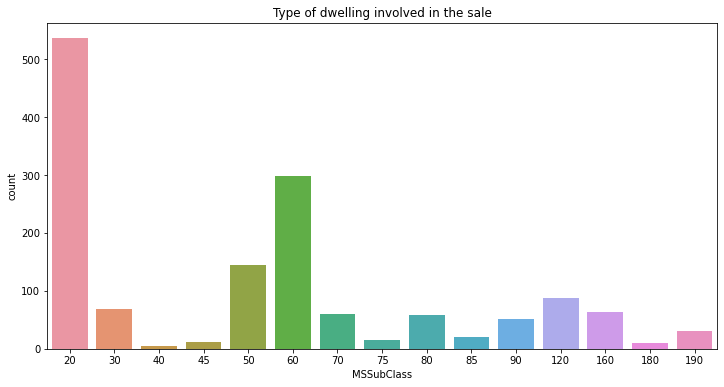

In [53]:
# Visualizing the value counts of the column 'MSSubClass'

plt.figure(figsize=[12,6])
sns.countplot(df.MSSubClass)
plt.title('Type of dwelling involved in the sale')
plt.show()

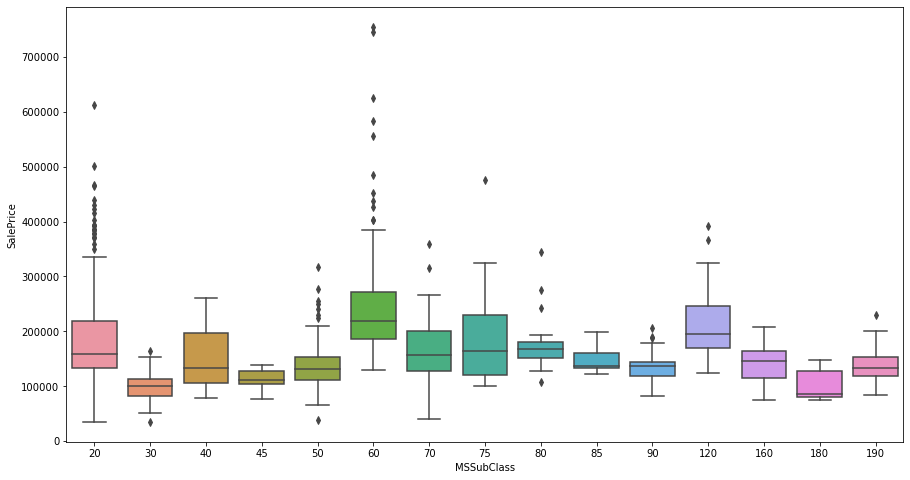

In [54]:
plt.figure(figsize=(15,8))
sns.boxplot(x='MSSubClass',y='SalePrice',data=df.sort_values('SalePrice',ascending=False))
plt.show()

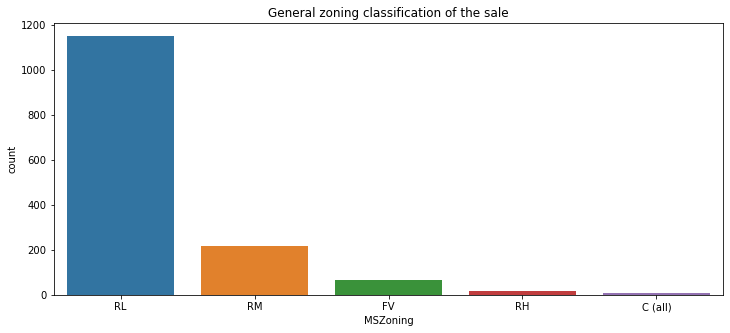

In [55]:
# Checking for the value counts of the column 'MSZoning'(Identifies the general zoning classification of the sale)

plt.figure(figsize=[12,5])
sns.countplot(df.MSZoning)
plt.title('General zoning classification of the sale')
plt.show()

- We can see that the maximum number of general zoning classification of the sale is Residential Low Density (RL) and the minimum is for the commercial.

<Figure size 864x576 with 0 Axes>

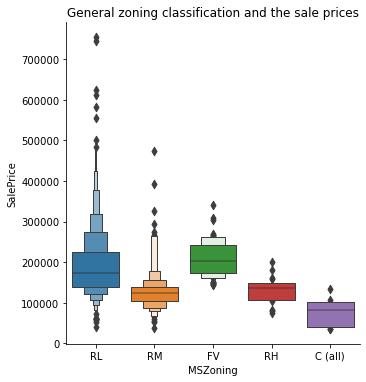

In [56]:
# Let's check the effect of zoning classification on the sale price.

plt.figure(figsize=[12,8])
sns.catplot(x='MSZoning', y='SalePrice',data=df.sort_values('SalePrice',ascending=False), kind='boxen')
plt.title('General zoning classification and the sale prices')
plt.show()

Observations:

- For Residential Low Density (RL), the maximum prices are ranging between 50,000 to 4,00,000.

- For Floating Village Residential (FV), the maximum prices are ranging between 150000 to 250000.

In [57]:
# Let's check for the type of road access to property

df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

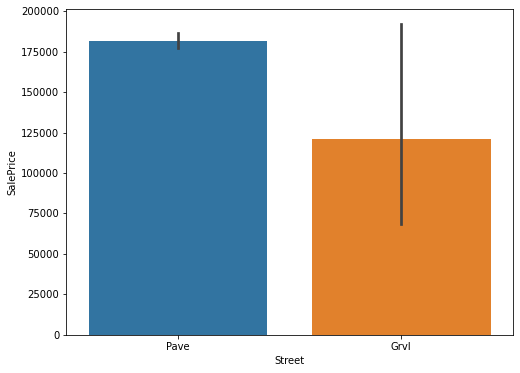

In [58]:
# Checking for the sale price on the basis of road access to the property

plt.figure(figsize=[8,6])
sns.barplot(x='Street', y='SalePrice', data = df.sort_values('SalePrice', ascending=False))

plt.show()

- we can observe that the property with the road access of Pave is in more demand and so its price is also high.

<AxesSubplot:ylabel='Alley'>

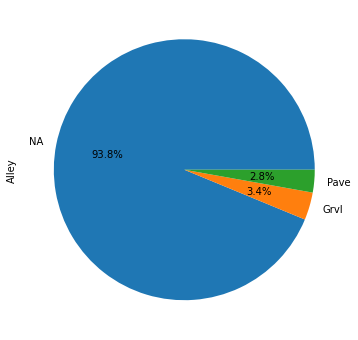

In [59]:
# Let's check for the alley access to property

plt.figure(figsize=[6,6])
df['Alley'].value_counts().plot.pie(autopct='%0.1f%%')

- We can see that approx 94% property have no alley access.

<Figure size 576x432 with 0 Axes>

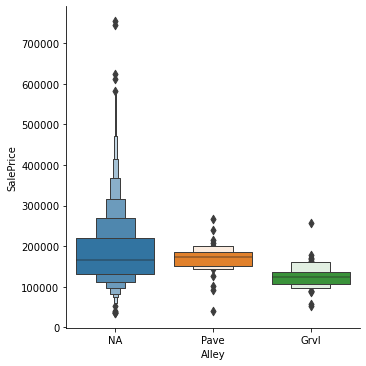

In [60]:
# Let's check the effect of alley access on the sale price.

plt.figure(figsize=[8,6])
sns.catplot(x='Alley', y='SalePrice', data=df.sort_values('SalePrice', ascending=False), kind = 'boxen')
plt.show()

We can observe that the effect of alley access to the properties is very less. So, it is better to remove this column as approx 94% of properties has no alley access.

In [61]:
# Dropping the alley column

df = df.drop(['Alley'], axis=1)

df.head() # Checking the dataset after removing the Alley column

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL    70.049958     4928   Pave      IR1         Lvl   
1  889          20       RL    95.000000    15865   Pave      IR1         Lvl   
2  793          60       RL    92.000000     9920   Pave      IR1         Lvl   
3  110          20       RL   105.000000    11751   Pave      IR1         Lvl   
4  422          20       RL    70.049958    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1    AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            6            5       1976          1976     Gable   
1     1Story            8            6       1970          1970      Flat   
2     2Story            7            5       1996          1997     Gable   
3     1Story            6            6       1977          1977       Hip   
4     1Story            6            7       1977          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     Plywood     Plywood       None         0.0        TA        TA   
1  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2  CompShg     MetalSd     MetalSd       None         0.0        Gd        TA   
3  CompShg     Plywood     Plywood    BrkFace       480.0        TA        TA   
4  CompShg     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          TA             5        Typ           1          TA     Attchd   
1          Gd             8        Typ           1          TA     Attchd   
2          TA             8        Typ           1          TA     Attchd  

<AxesSubplot:ylabel='LotShape'>

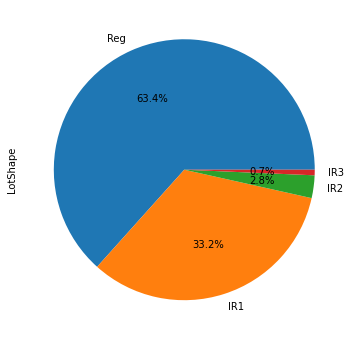

In [62]:
# Let's check for the General shape of property

plt.figure(figsize=[6,6])
df['LotShape'].value_counts().plot.pie(autopct='%0.1f%%')

Observations:

- We can see that most of the properties are of regular shape (approx 63%).
- Approx 33% properties are of slightly irregular shape.

<Figure size 576x288 with 0 Axes>

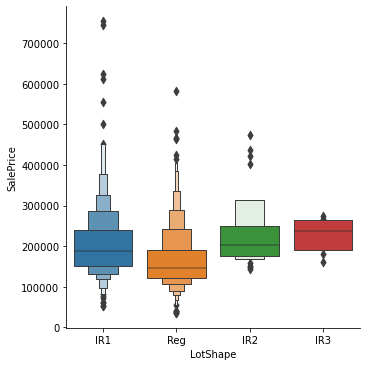

In [63]:
# Checking the relation of property shape on the sale price

plt.figure(figsize=[8,4])
sns.catplot(x='LotShape', y='SalePrice', data=df.sort_values('SalePrice', ascending=False), kind = 'boxen')
plt.show()

<AxesSubplot:xlabel='LandContour', ylabel='count'>

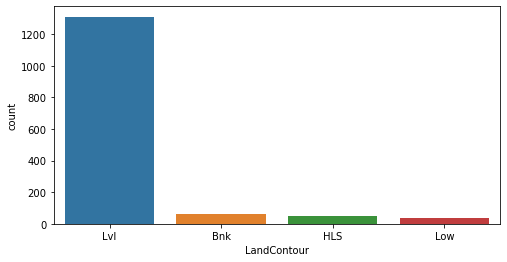

In [64]:
# Let's check for the Flatness of the property

plt.figure(figsize=[8,4])
sns.countplot(df['LandContour'])

- Most of the properties are of near flat level

<Figure size 576x288 with 0 Axes>

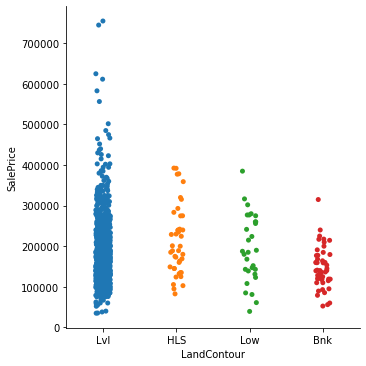

In [65]:
# Let's check for the effect of flatness of the property on the sale price

plt.figure(figsize=[8,4])
sns.catplot(x='LandContour', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))


<AxesSubplot:ylabel='Utilities'>

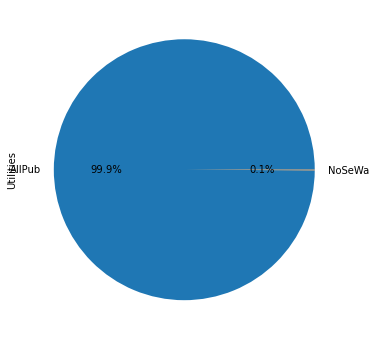

In [66]:
# Let's check for the type of utilities available in the property

plt.figure(figsize=[6,6])
df['Utilities'].value_counts().plot.pie(autopct='%0.1f%%')

- We can see that approx 100% properties have all public Utilities (E,G,W,& S). So, we can drop this column as this will  not contribute to the dataset in the model building.

In [67]:
# Dropping the 'Utilities' column

df = df.drop(['Utilities'], axis=1)

df.head() # Checking the dataset again

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL    70.049958     4928   Pave      IR1         Lvl   
1  889          20       RL    95.000000    15865   Pave      IR1         Lvl   
2  793          60       RL    92.000000     9920   Pave      IR1         Lvl   
3  110          20       RL   105.000000    11751   Pave      IR1         Lvl   
4  422          20       RL    70.049958    16635   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
4       FR2       Gtl       NWAmes       Norm       Norm     1Fam     1Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            5       1976          1976     Gable  CompShg   
1            8            6       1970          1970      Flat  Tar&Grv   
2            7            5       1996          1997     Gable  CompShg   
3            6            6       1977          1977       Hip  CompShg   
4            6            7       1977          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Plywood     Plywood       None         0.0        TA        TA   
1     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2     MetalSd     MetalSd       None         0.0        Gd        TA   
3     Plywood     Plywood    BrkFace       480.0        TA        TA   
4     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          TA             5        Typ           1          TA     Attchd   
1          Gd             8        Typ           1          TA     Attchd   
2          TA             8        Typ           1          TA     Attchd   
3          TA             7        Typ           1        

<AxesSubplot:ylabel='LotConfig'>

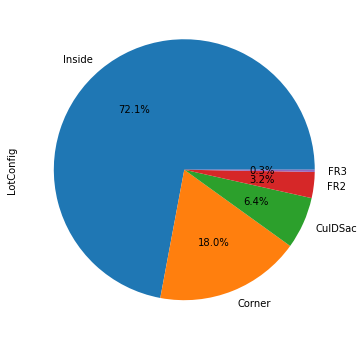

In [68]:
# Let's check for the lot configuration

plt.figure(figsize=[6,6])
df['LotConfig'].value_counts().plot.pie(autopct='%0.1f%%')

- Approx 72% properties have inside lot configuration.

- 18% properties have corner lot.

- Only 0.3% properties have frontage on 3 sides of property.

<Figure size 432x288 with 0 Axes>

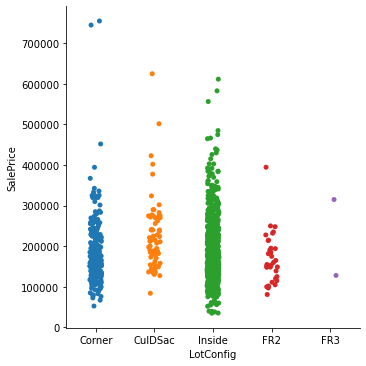

In [69]:
# Checking for the lot configuration and its effect on the sale pricing.

plt.figure(figsize=[6,4])
sns.catplot(x='LotConfig', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))

<AxesSubplot:ylabel='LandSlope'>

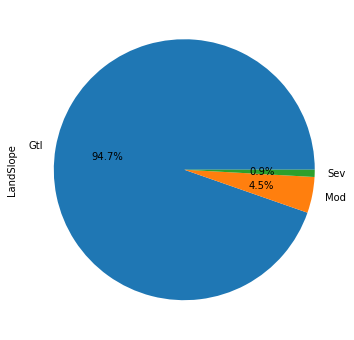

In [70]:
# Let's check for the slope of the property

plt.figure(figsize=[6,6])
df['LandSlope'].value_counts().plot.pie(autopct='%0.1f%%')

- Approx 95% properties having gentle slope.
- Only approx 1% properties having severe Slope and 4.5% properites having moderate slope.

<Figure size 576x432 with 0 Axes>

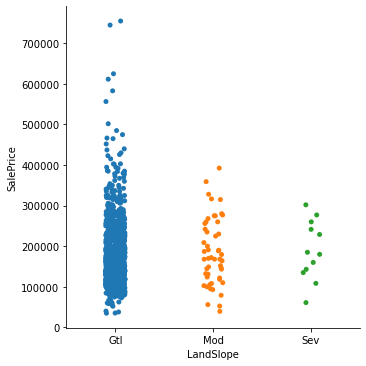

In [71]:
# Cheecking for the slope wise sale pricing of the properties

plt.figure(figsize=[8,6])
sns.catplot(x='LandSlope', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))

- The maximum gentle slope type properties having the sale price ranging between 100000 to 300000.

In [72]:
# Let's look at the physical locations within Ames city limits

df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

- Maximum properties are having North Ames (225).
- Only 2 properties are having Bluestem.

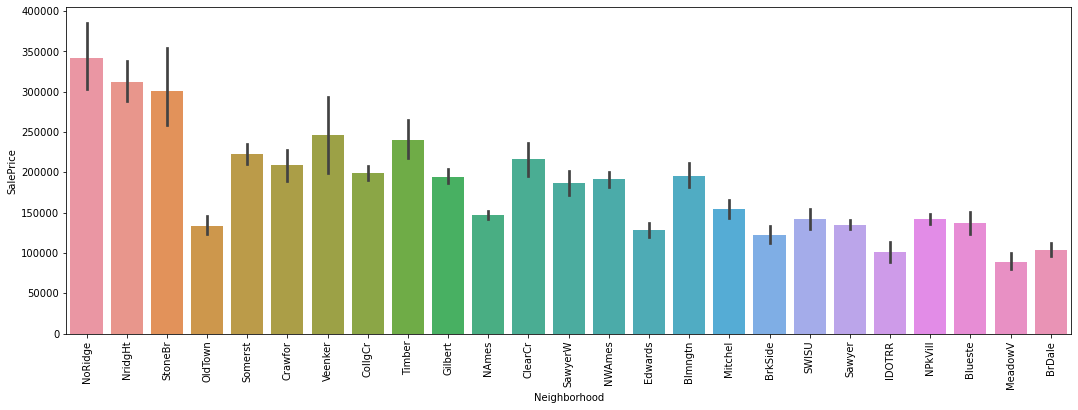

In [73]:
# Checking for the effect of physical locations within Ames city limits on the sale price

plt.figure(figsize=[18,6])
sns.barplot(x='Neighborhood', y='SalePrice', data= df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [74]:
# Let's check for the proximity to various conditions

df['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [75]:
# Checking for the value counts of Condition2 column (Proximity to various conditions (if more than one is present))

df['Condition2'].value_counts()

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64

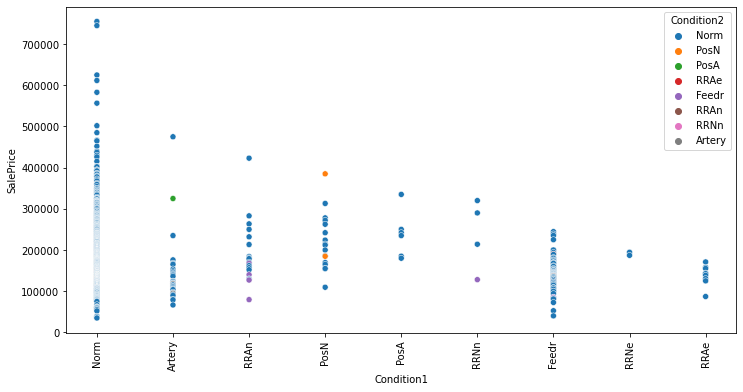

In [76]:
# Checking for the sale pricing proximity wise

plt.figure(figsize=[12,6])
sns.scatterplot(x='Condition1', y='SalePrice', hue='Condition2', data=df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [77]:
# Checking for the value counts of type of dwelling 

df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

- Single-family Detached dewlling is most popular.
- Two-family Conversion; originally built as one-family dwelling is least popular.

In [78]:
# Checking for the value counts of the style of dwelling

df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

- One story style of houses are most popular.
- Two and one-half story: 2nd level finished style of house is least popular.

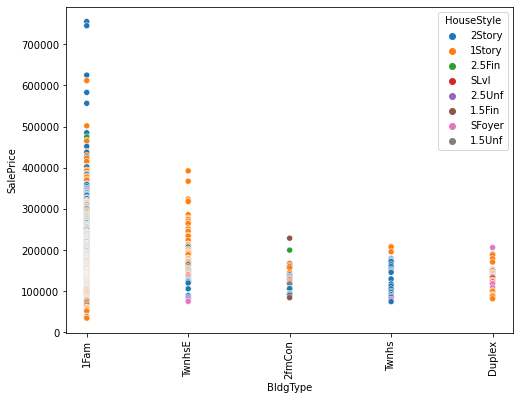

In [79]:
# Let's check for the type & style of dwelling

plt.figure(figsize=[8,6])
sns.scatterplot(x= 'BldgType', y='SalePrice', hue = 'HouseStyle', data = df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation = 90)
plt.show()

In [80]:
# Checking for the value counts of the Rates the overall material and finish of the house

df['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

- Most of the houses are rated 5 which means the overall material and finish of the houses are average and above average.
- Very few houses was rated 1 which says the overall material and finish of very few houses are very poor.

In [81]:
# Checking for the value counts of the rates the overall condition of the house

df['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

- Most of the houses are rated average and above average for the overall condition of the house.
- None of the houses got the ratings of very excellent.

<Figure size 576x432 with 0 Axes>

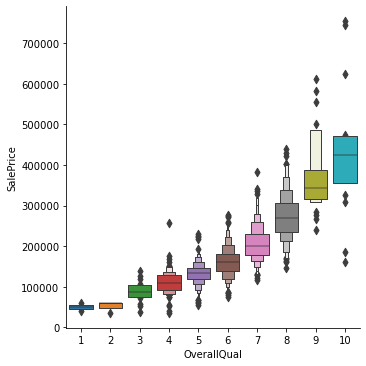

In [82]:
# Let's check for the saleprices based on the ratings of overall material and finish of the house

plt.figure(figsize=[8,6])
sns.catplot(x='OverallQual', y='SalePrice', data = df.sort_values('SalePrice', ascending=False), kind = 'boxen')

plt.show()

Notations:

- 1:  Very Poor

- 2:  Poor

- 3:  Fair

- 4:  Below Average

- 5:  Average

- 6:  Above Average

- 7:  Good

- 8:  Very Good

- 9:  Excellent

- 10: Very Excellent

- We can see that as the ratings are increasing the price of the property is also increasing.

<Figure size 576x432 with 0 Axes>

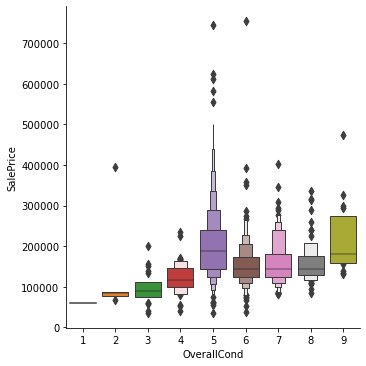

In [83]:
# Let's check for the saleprices based on the ratings of overall condition of the house

plt.figure(figsize=[8,6])
sns.catplot(x='OverallCond', y='SalePrice', data = df.sort_values('SalePrice', ascending=False), kind = 'boxen')

plt.show()

- We can see that the price of the house is highest for the house which got 9 ratings (Excellent)

In [84]:
# Let's check for the value counts of type of roof of the houses

df['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

- Maximum houses having Gable type of roof.

In [85]:
# Checking for the value counts of the material used for the roof.

df['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Roll          1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64

- Maximum houses having the roof which is made up of Standard (Composite) Shingle

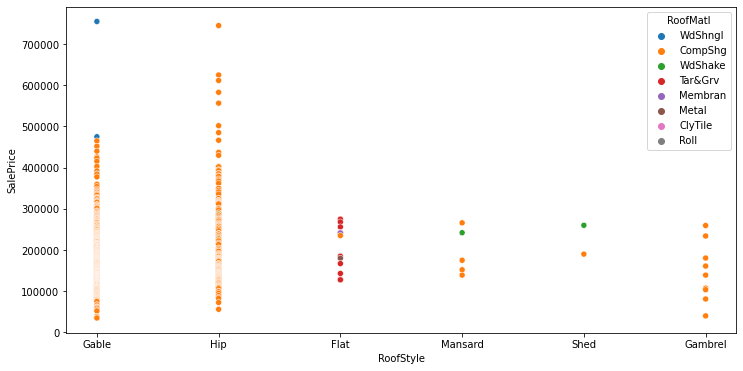

In [86]:
# Let's check for the effect of roof on the sale price

plt.figure(figsize=[12,6])
sns.scatterplot(x='RoofStyle', y='SalePrice', hue = 'RoofMatl', data = df.sort_values('SalePrice', ascending=False))

plt.show()

- We can see that the most of the roof are made up of Standard (Composite) Shingle.
- The highest price of the house having Gable roof type and the material of the roof is Wood Shingles.

In [87]:
# Let's check for the value counts of the exterior covering on house

df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

Notation:

-      AsbShng	Asbestos Shingles
-      AsphShn	Asphalt Shingles
-      BrkComm	Brick Common
-      BrkFace	Brick Face
-      CBlock	Cinder Block
-      CemntBd	Cement Board
-      HdBoard	Hard Board
-      ImStucc	Imitation Stucco
-      MetalSd	Metal Siding
-      Other	Other
-      Plywood	Plywood
-      PreCast	PreCast	
-      Stone	Stone
-      Stucco	Stucco
-      VinylSd	Vinyl Siding
-      Wd Sdng	Wood Siding
-      WdShing	Wood Shingles

In [88]:
# Checking for the value counts of the exterior covering on house (if more than one material)

df['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

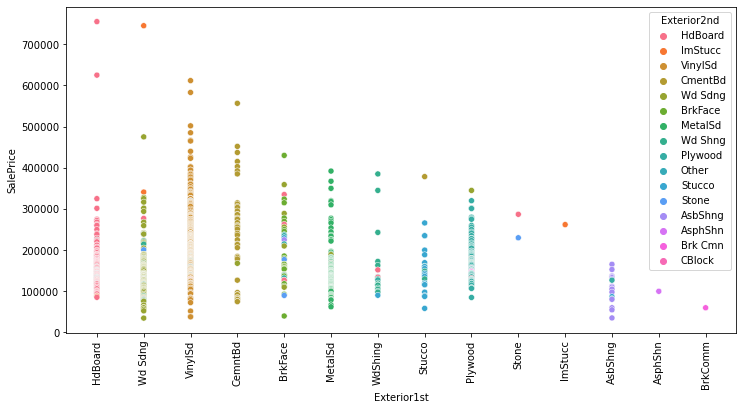

In [89]:
# Let's check for the exterior covering on the house and its effect on the sale price

plt.figure(figsize=[12,6])
sns.scatterplot(x='Exterior1st', y='SalePrice', hue = 'Exterior2nd', data = df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [90]:
# Let's check for the value counts of the masonry veneer type

df['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

- Most of the houses have no masonry veneer.

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

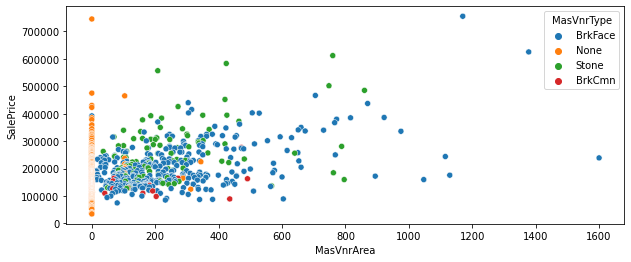

In [91]:
# Let's check for the sale price based on the masonry veneer

plt.figure(figsize=[10,4])
sns.scatterplot(x='MasVnrArea', y='SalePrice', hue = 'MasVnrType', data = df.sort_values('SalePrice', ascending=False))

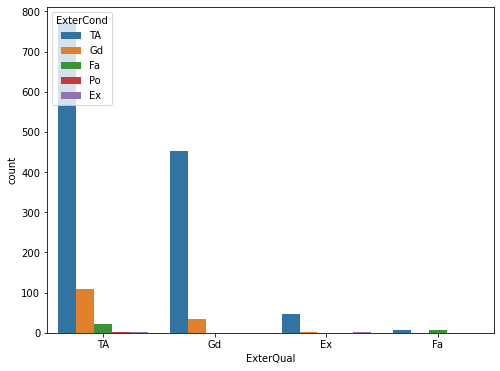

In [92]:
#Let's check for the value counts of the quality of the material on the exterior

plt.figure(figsize=[8,6])
sns.countplot(x='ExterQual', hue = 'ExterCond', data = df)
plt.show()

Notations:

-      Ex	Excellent
-      Gd	Good
-      TA	Average/Typical
-      Fa	Fair
-      Po	Poor

    - Most of the houses are of average/typical quality of the material on the exterior.
    - None houses have poor quality of material on the exterior.

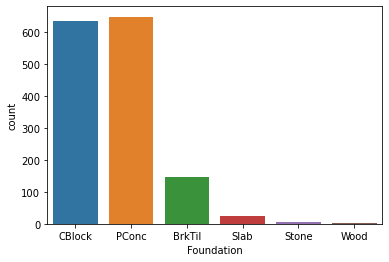

In [93]:
# Let's check for the type of foundation

plt.figure(figsize=[6,4])
sns.countplot(x='Foundation', data = df)

plt.show()

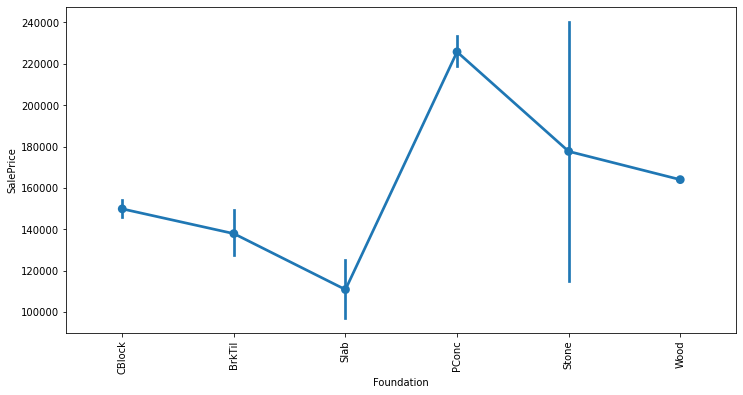

In [94]:
# Let's check for the effect of foundation on the sale price

plt.figure(figsize=[12,6])
sns.pointplot(x='Foundation', y = 'SalePrice', data=df.sort_values('SalePrice'))
plt.xticks(rotation=90)
plt.show()

In [95]:
# Let's check for the central air conditioning

df['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

- Most of the houses having central air conditioning

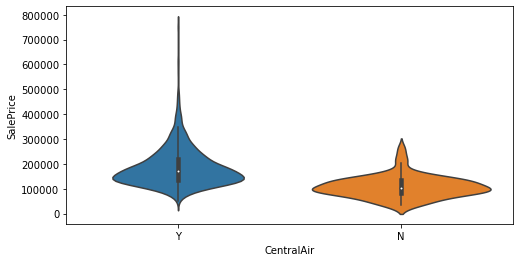

In [96]:
# Checking for the price of the houses on the basis of air conditioning

plt.figure(figsize=[8,4])
sns.violinplot(x='CentralAir', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))

plt.show()

- Houses having the option of central air conditioning have more price.

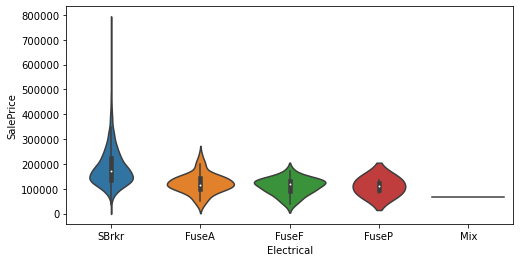

In [97]:
# Let's check for the electrical system of the house

plt.figure(figsize=[8,4])
sns.violinplot(x='Electrical', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))

plt.show()

Notation:

-      SBrkr	Standard Circuit Breakers & Romex
-      FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
-      FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
-      FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
-      Mix	Mixed

    - Most of the houses are having the electrical system of standard circuit breakers and romex.

In [98]:
# Let's check value count for the home functionality (Assume typical unless deductions are warranted)

df['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

Notations:

-      Typ	Typical Functionality
-      Min1	Minor Deductions 1
-      Min2	Minor Deductions 2
-      Mod	Moderate Deductions
-      Maj1	Major Deductions 1
-      Maj2	Major Deductions 2
-      Sev	Severely Damaged
-      Sal	Salvage only

    - Maximum home have typical functionality.

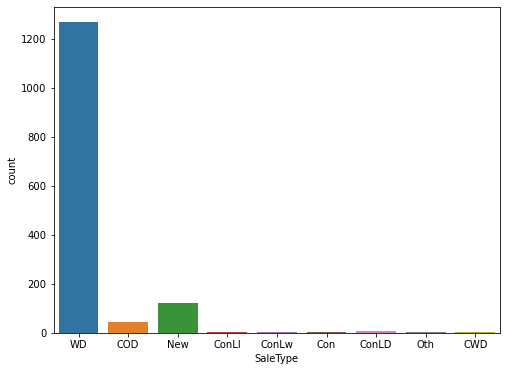

In [99]:
# Let's check for the sale type

plt.figure(figsize=[8,6])
sns.countplot(df['SaleType'])
plt.show()

Notation:

-  WD 	Warranty Deed - Conventional
-  CWD	Warranty Deed - Cash
-  VWD	Warranty Deed - VA Loan
-  New	Home just constructed and sold
-  COD	Court Officer Deed/Estate
-  Con	Contract 15% Down payment regular terms
- ConLw	Contract Low Down payment and low interest
- ConLI	Contract Low Interest
- ConLD	Contract Low Down
- Oth	Other
    
    - Most of the sale type are Warranty Deed - Conventional.

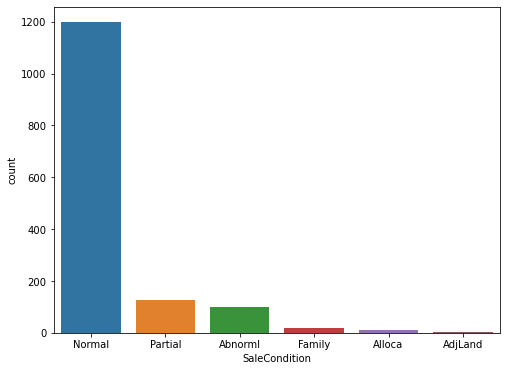

In [100]:
# Checking for the value counts of the condition of sale

plt.figure(figsize=[8,6])
sns.countplot(df['SaleCondition'])
plt.show()

Notation:

- Normal	Normal Sale
- Abnorml	Abnormal Sale -  trade, foreclosure, short sale
- AdjLand	Adjoining Land Purchase
- Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
- Family	Sale between family members
- Partial	Home was not completed when last assessed (associated with New Homes)

    - Most of the sale are normal sale.

#### Label Encoding the categorical column:

In [101]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_columns = ('MSZoning', 'Street','LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType','GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'Source')

for c in cat_columns:
    le.fit(list(df[c].values))
    le.classes_
    df[c] = le.transform(list(df[c].values))

In [102]:
# Checking the dataset again after label encoding

df.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  127         120         3    70.049958     4928       1         0   
1  889          20         3    95.000000    15865       1         0   
2  793          60         3    92.000000     9920       1         0   
3  110          20         3   105.000000    11751       1         0   
4  422          20         3    70.049958    16635       1         0   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0            3          4          0            13           2           2   
1            3          4          1            12           2           2   
2            3          1          0            15           2           2   
3            3          4          0            14           2           2   
4            3          2          0            14           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         4           2            6            5       1976          1976   
1         0           2            8            6       1970          1970   
2         0           5            7            5       1996          1997   
3         0           2            6            6       1977          1977   
4         0           2            6            7       1977          2000   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          1         1            9           10           2         0.0   
1          0         5           13           14           2         0.0   
2          1         1            8            8           2         0.0   
3          3         1            9           10           1       480.0   
4          1         1            5            5           3       126.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          3          4           1         2         4             4   
1          2          2           2         4         1             1   
2          2          4           2         2         4             0   
3          3          4           1         2         4             4   
4          2          4           1         2         4             4   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             0         120             6           0        958         1078   
1             0         351             5         823       1043         2217   
2             2         862             6           0        255         1117   
3             1         705             6           0       1139         1844   
4             0        1246             6           0        356         1602   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0        1          4           1           4       958         0   
1        1          0           1           4      2217         0   
2        1          0           1           4      1127       886   
3        1          0           1           4      1844         0   
4        1          2           1           4      1602         0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0        958             0             0         2         0   
1             0       2217             1             0         2         0   
2             0       2013             1             0         2         1   
3             0       1844             0             0         2         0   
4             0       1602             0             1         2         0   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             2             1            3             5           6   
1             4             1            2             8           6   
2             3             1            3             8           6   
3             3             1            3             7           6   
4     

#### Checking for the data distribution among all the columns:

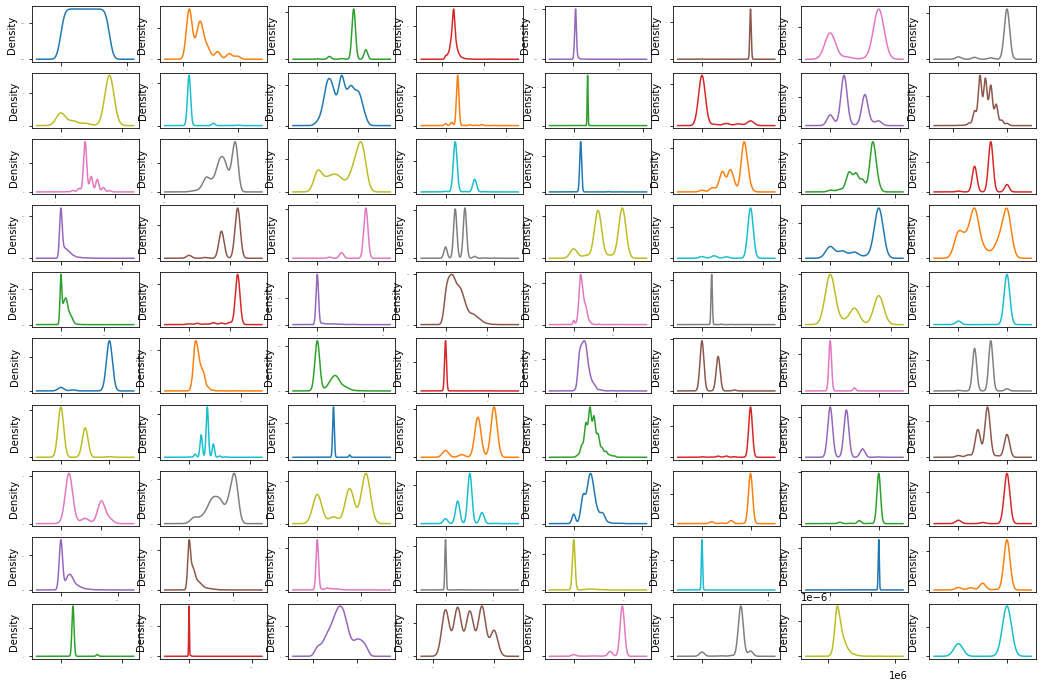

In [103]:
df.plot(kind='density', subplots=True, layout=(10,8), sharex=False, legend=False, fontsize=1, figsize=[18,12])
plt.show()

- The above graph shows that skewness is present in the dataset.

#### Stastical Summary:

In [104]:
# Checking for the stastical summary of the dataset.
df.describe()

Id   MSSubClass     MSZoning  LotFrontage        LotArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean    730.500000    56.897260     3.028767    70.049958   10516.828082   
std     421.610009    42.300571     0.632017    22.024023    9981.264932   
min       1.000000    20.000000     0.000000    21.000000    1300.000000   
25%     365.750000    20.000000     3.000000    60.000000    7553.500000   
50%     730.500000    50.000000     3.000000    70.049958    9478.500000   
75%    1095.250000    70.000000     3.000000    79.000000   11601.500000   
max    1460.000000   190.000000     4.000000   313.000000  215245.000000   

            Street     LotShape  LandContour    LotConfig    LandSlope  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.995890     1.942466     2.777397     3.019178     0.062329   
std       0.063996     1.409156     0.707666     1.622634     0.276232   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     3.000000     2.000000     0.000000   
50%       1.000000     3.000000     3.000000     4.000000     0.000000   
75%       1.000000     3.000000     3.000000     4.000000     0.000000   
max       1.000000     3.000000     3.000000     4.000000     2.000000   

       Neighborhood   Condition1   Condition2     BldgType   HouseStyle  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      12.251370     2.031507     2.008219     0.493151     3.038356   
std        6.013735     0.868515     0.259040     1.198277     1.911305   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        7.000000     2.000000     2.000000     0.000000     2.000000   
50%       12.000000     2.000000     2.000000     0.000000     2.000000   
75%       17.000000     2.000000     2.000000     0.000000     5.000000   
max       24.000000     8.000000     7.000000     4.000000     7.000000   

       OverallQual  OverallCond    YearBuilt  YearRemodAdd    RoofStyle  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean      6.099315     5.575342  1971.267808   1984.865753     1.410274   
std       1.382997     1.112799    30.202904     20.645407     0.834998   
min       1.000000     1.000000  1872.000000   1950.000000     0.000000   
25%       5.000000     5.000000  1954.000000   1967.000000     1.000000   
50%       6.000000     5.000000  1973.000000   1994.000000     1.000000   
75%       7.000000     6.000000  2000.000000   2004.000000     1.000000   
max      10.000000     9.000000  2010.000000   2010.000000     5.000000   

          RoofMatl  Exterior1st  Exterior2nd   MasVnrType   MasVnrArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      1.075342     9.624658    10.339726     1.762329   103.685262   
std       0.599127     3.197659     3.540570     0.614274   180.569112   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     8.000000     8.000000     1.000000     0.000000   
50%       1.000000    12.000000    13.000000     2.000000     0.000000   
75%       1.000000    12.000000    13.000000     2.000000   164.250000   
max       7.000000    14.000000    15.000000     3.000000  1600.000000   

         ExterQual    ExterCond   Foundation     BsmtQual     BsmtCond  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      2.539726     3.733562     1.396575     2.724658     3.691096   
std       0.693995     0.731807     0.722394     1.278630     0.949616   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     4.000000     1.000000     2.000000     4.000000   
50%       3.000000     4.000000     1.000000     2.000000     4.000000   
75%       3.000000     4.000000     2.000000     4.000000     4.000000   
max       3.000000     4.000000     5.000000     4.00

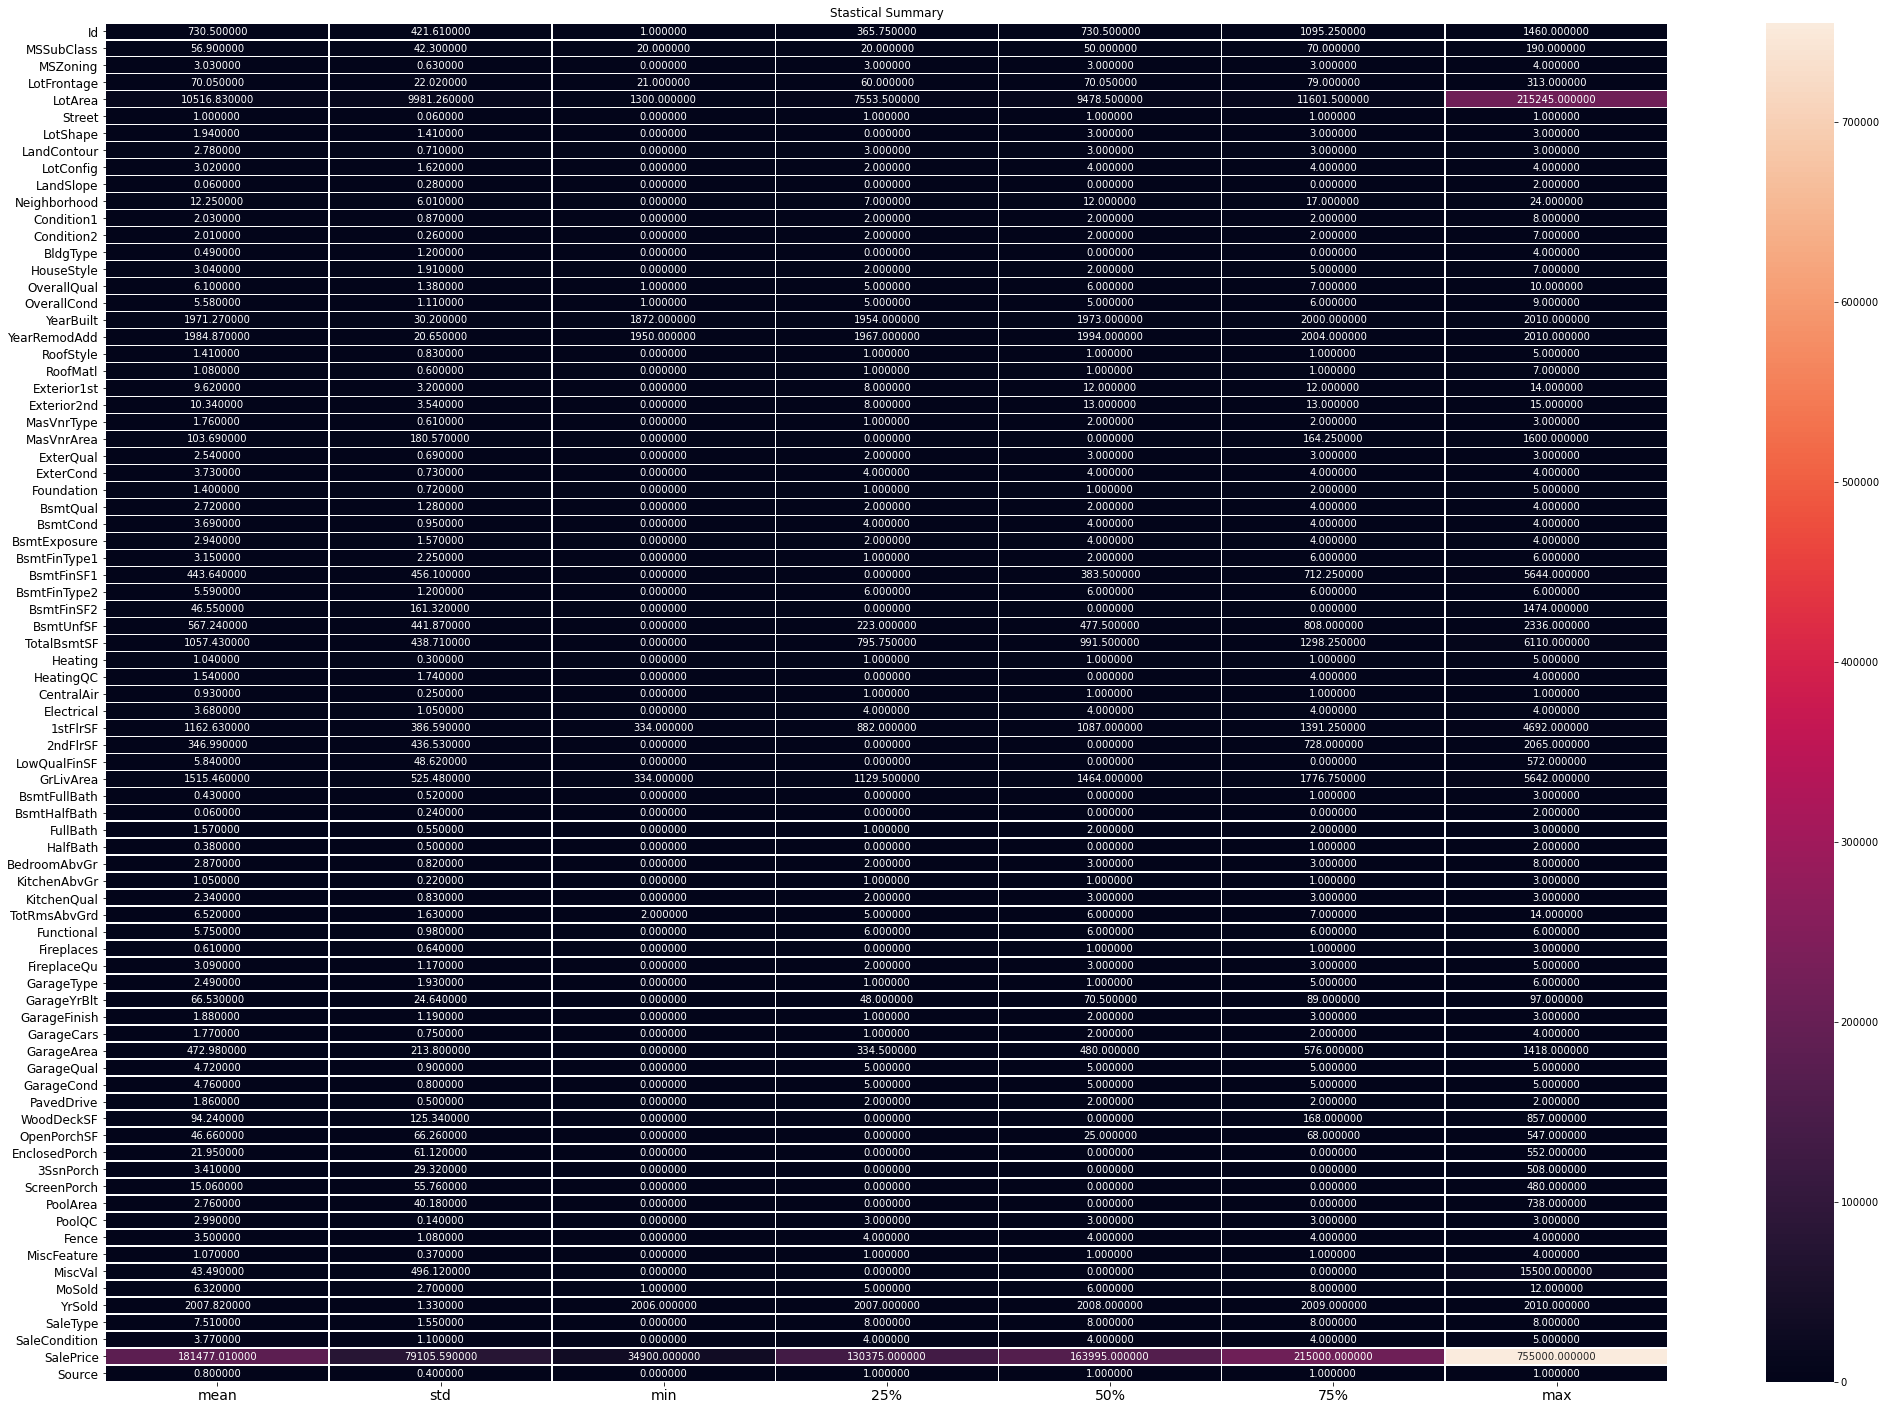

In [105]:
# Plotting heatmap for the stastical summary

plt.figure(figsize=[35,25])
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.45, linecolor='white', fmt='f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title('Stastical Summary')
plt.show()

#### Checking for the correlation:

In [106]:
df.corr()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.011156 -0.006096    -0.009601 -0.033226   
MSSubClass     0.011156    1.000000  0.035900    -0.357056 -0.139781   
MSZoning      -0.006096    0.035900  1.000000    -0.106363 -0.034452   
LotFrontage   -0.009601   -0.357056 -0.106363     1.000000  0.306795   
LotArea       -0.033226   -0.139781 -0.034452     0.306795  1.000000   
Street         0.008916   -0.024969  0.087654    -0.037323 -0.197131   
LotShape       0.032122    0.119289  0.061887    -0.144931 -0.165315   
LandContour   -0.019659   -0.002940 -0.017854    -0.075647 -0.149083   
LotConfig      0.049756    0.075910 -0.009895    -0.181253 -0.121161   
LandSlope      0.005847   -0.025672 -0.022055     0.067608  0.436868   
Neighborhood  -0.013735   -0.005985 -0.249679     0.084545  0.044569   
Condition1    -0.003815   -0.024762 -0.027874    -0.008483  0.023846   
Condition2     0.001839   -0.042395  0.044606     0.003214  0.022164   
BldgType       0.021912    0.746063  0.005690    -0.408564 -0.205721   
HouseStyle     0.018111    0.397161 -0.105315     0.031907 -0.033190   
OverallQual   -0.028365    0.032628 -0.160099     0.234196  0.105806   
OverallCond    0.012609   -0.059316  0.186951    -0.052820 -0.005636   
YearBuilt     -0.012713    0.027850 -0.308908     0.117598  0.014228   
YearRemodAdd  -0.021998    0.040581 -0.174728     0.082746  0.013788   
RoofStyle      0.038675   -0.117817 -0.000301     0.153467  0.077054   
RoofMatl      -0.022562   -0.031336  0.005133     0.082026  0.149837   
Exterior1st   -0.034694   -0.089159 -0.008558     0.074448  0.004256   
Exterior2nd   -0.042847   -0.137229  0.006963     0.098756 -0.003930   
MasVnrType     0.051971   -0.029850 -0.028279    -0.020220 -0.008122   
MasVnrArea    -0.050199    0.022895 -0.066766     0.179283  0.103960   
ExterQual      0.001689   -0.017161  0.200536    -0.183293 -0.057275   
ExterCond      0.029826   -0.003254 -0.096041     0.047951  0.015160   
Foundation     0.008514    0.058126 -0.235174     0.098809 -0.011081   
BsmtQual       0.047668   -0.081702  0.160778    -0.139701 -0.061495   
BsmtCond       0.007223   -0.017905 -0.011450     0.055936  0.016715   
BsmtExposure  -0.025879   -0.065218  0.037108    -0.130047 -0.152436   
BsmtFinType1   0.016616    0.006437  0.026347    -0.023136 -0.057081   
BsmtFinSF1    -0.005024   -0.069836 -0.049128     0.215828  0.214103   
BsmtFinType2   0.045877    0.037025 -0.034004    -0.017142 -0.056425   
BsmtFinSF2    -0.005968   -0.065649  0.028086     0.043340  0.111170   
BsmtUnfSF     -0.007940   -0.140759 -0.046749     0.122156 -0.002618   
TotalBsmtSF   -0.015415   -0.238518 -0.087834     0.363358  0.260833   
Heating        0.042120    0.048009  0.056866    -0.020815  0.028158   
HeatingQC      0.002157    0.020760  0.134279    -0.079975  0.004212   
CentralAir     0.009821   -0.101774 -0.049523     0.068666  0.049755   
Electrical     0.037632    0.051945 -0.070818     0.060213  0.043856   
1stFlrSF       0.010496   -0.251758 -0.055614     0.414266  0.299475   
2ndFlrSF       0.005590    0.307886 -0.051481     0.072483  0.050986   
LowQualFinSF  -0.044230    0.046474  0.011520     0.036849  0.004779   
GrLivArea      0.008273    0.074853 -0.082615     0.368392  0.263116   
BsmtFullBath   0.002289    0.003491 -0.018526     0.091481  0.158155   
BsmtHalfBath  -0.020155   -0.002333  0.007193    -0.006419  0.048046   
FullBath       0.005587    0.131608 -0.198290     0.180424  0.126031   
HalfBath       0.006784    0.177354 -0.133876     0.048258  0.014259   
BedroomAbvGr   0.037719   -0.023438 -0.016471     0.237023  0.119690   
KitchenAbvGr   0.002951    0.281721  0.049434    -0.005805 -0.017784   
KitchenQual   -0.004432    0.010129  0.128976    -0.189082 -0.057018   
TotRmsAbvGrd   0.027239    0.040380 -0.043200     0.320146  0.190015   
Functional    -0.001064    0.003711 -0.095722     0.030250 -0.022317   
Fireplaces    -0.019772   -0.045569 -0.011349     0.235755  0

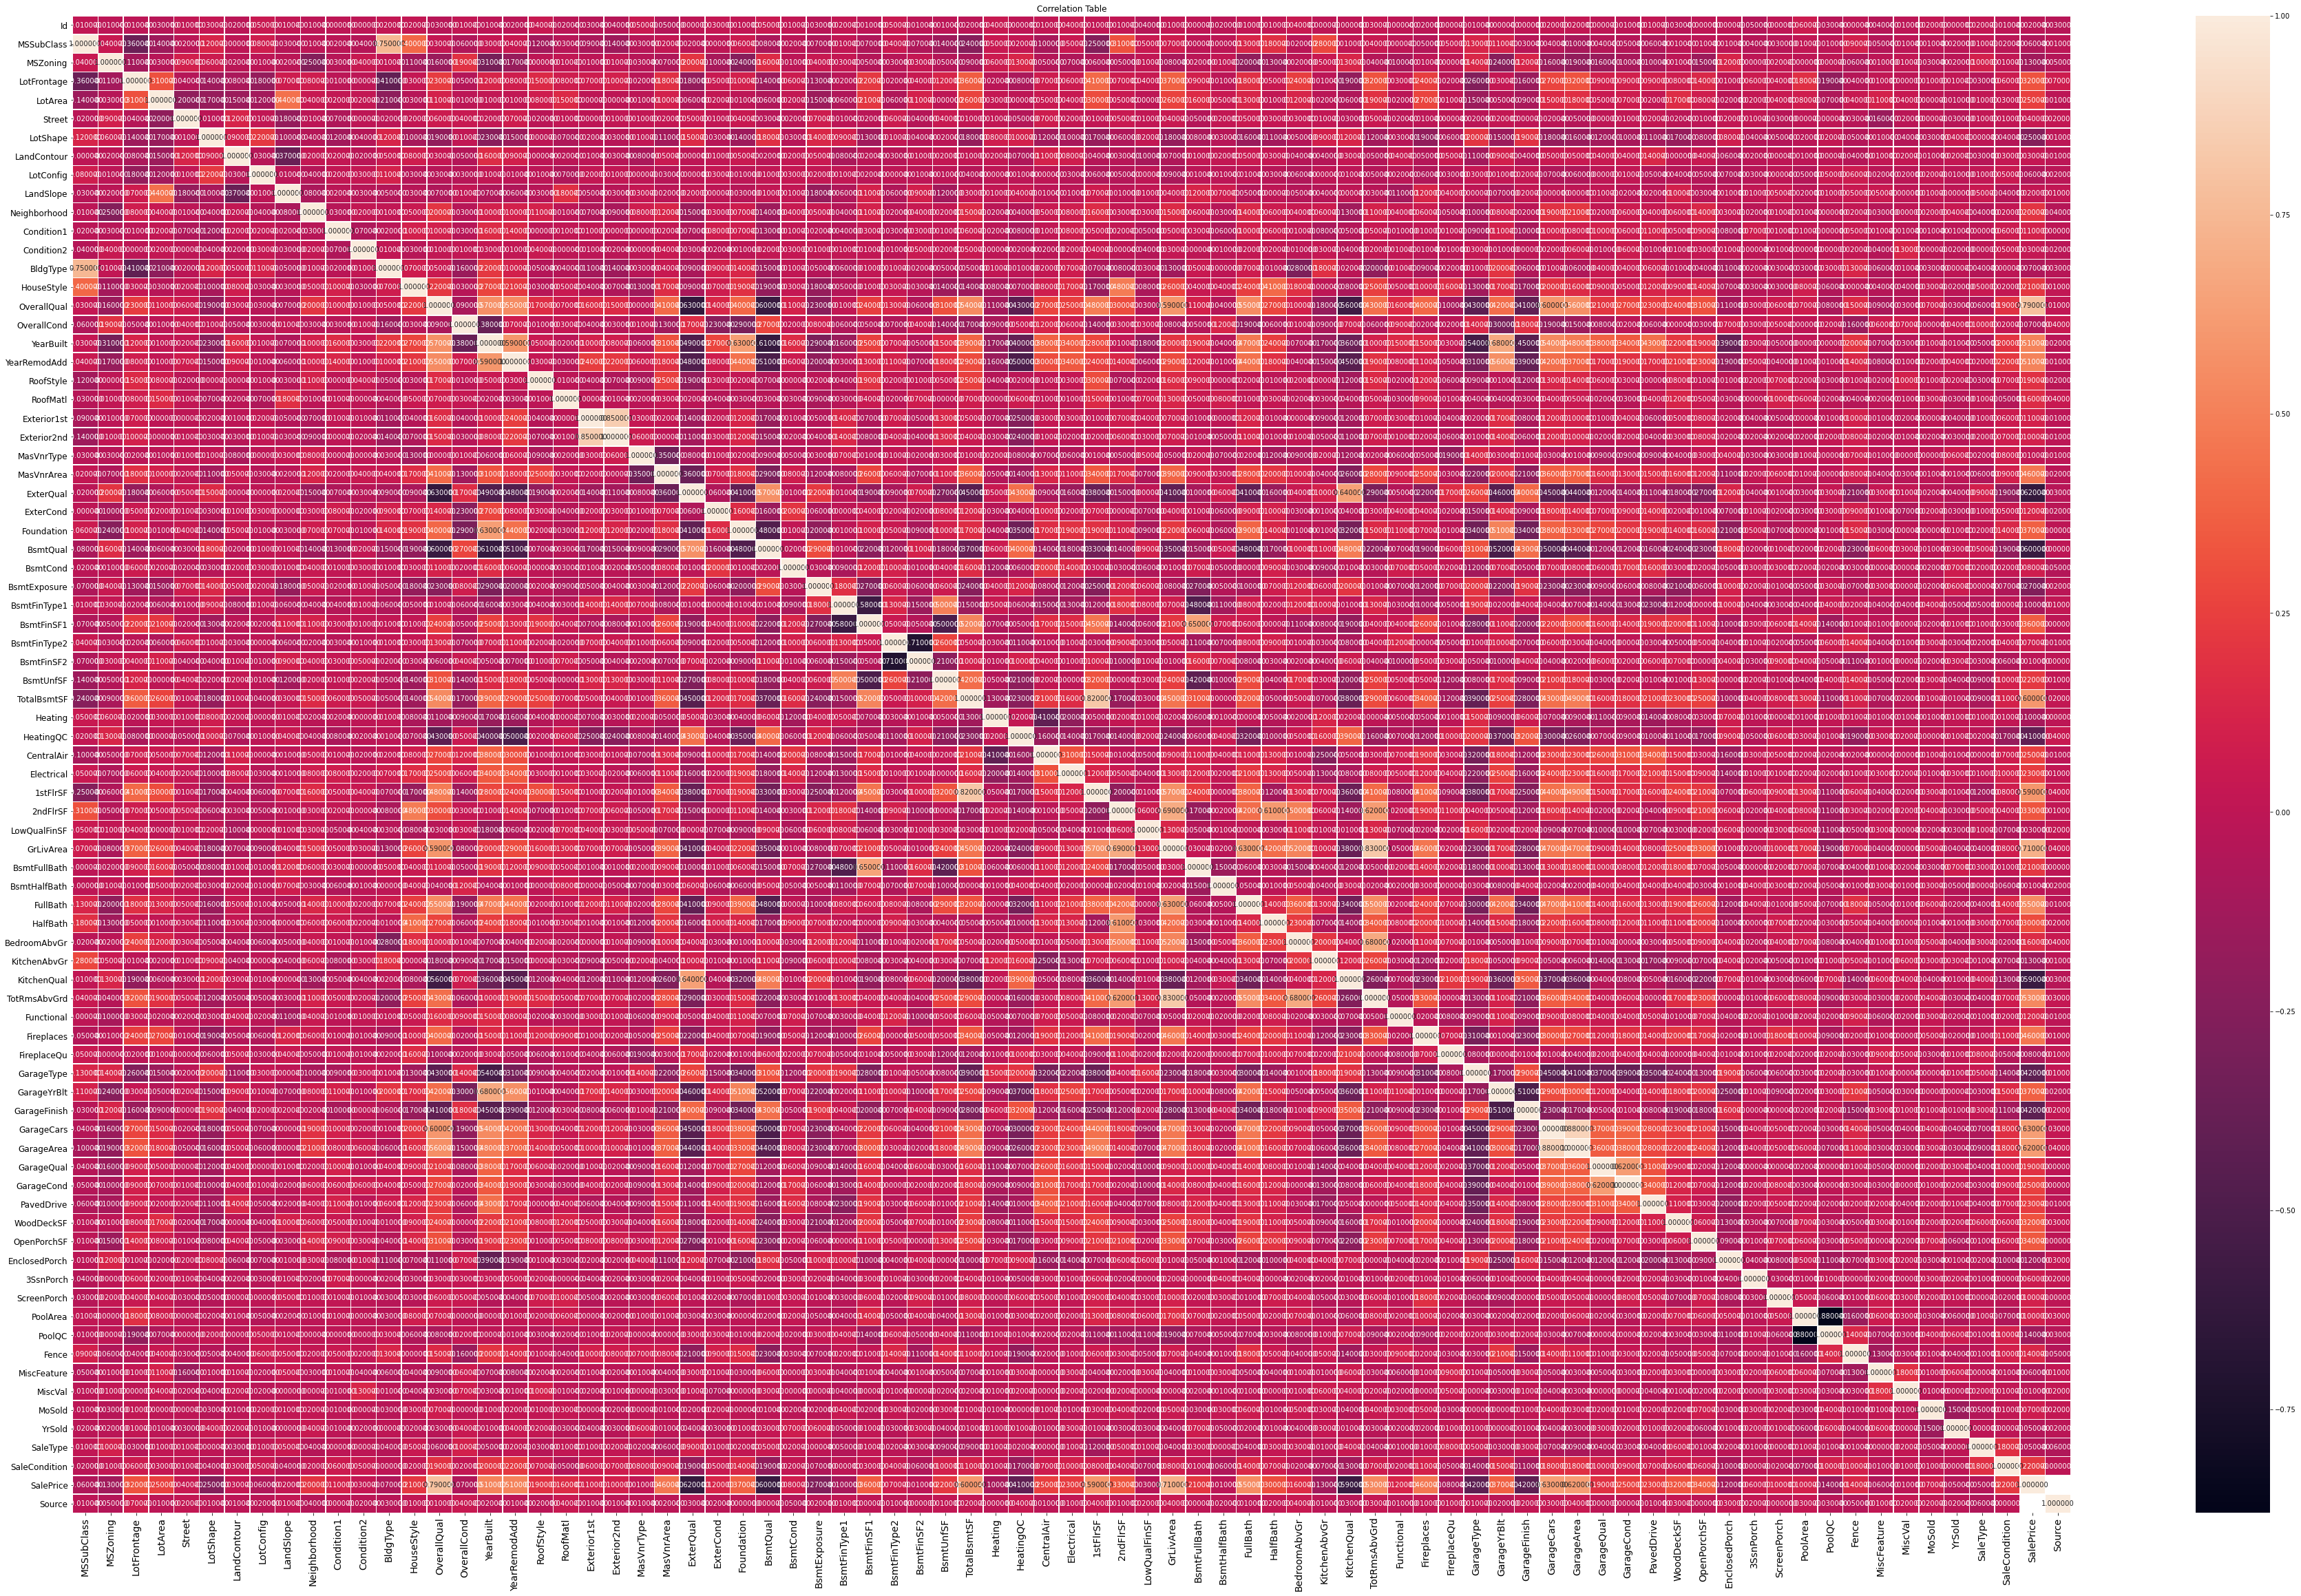

In [107]:
# plotting heatmap to show the correlation table 

plt.figure(figsize=[65,40])
sns.heatmap(round(df.corr()[1:].transpose(),2), annot= True, linewidths=0.45, linecolor='white', fmt='f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title('Correlation Table')
plt.show()

#### Splitting the dataset into training and test dataset:

In [132]:
#training dataset:

train_data = df[:1168]

train_data = train_data.drop(['Source'],axis = 1)

train_data.tail()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
1163  289          20         3    70.049958     9819       1         0   
1164  554          20         3    67.000000     8777       1         3   
1165  196         160         3    24.000000     2280       1         3   
1166   31          70         0    50.000000     8500       1         3   
1167  617          60         3    70.049958     7861       1         0   

      LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
1163            3          4          0            19           2           2   
1164            3          4          0             7           1           2   
1165            3          2          0            13           2           2   
1166            3          4          0             9           1           2   
1167            3          4          0             8           2           2   

      BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1163         0           2            5            5       1967          1967   
1164         0           2            4            5       1949          2003   
1165         3           5            6            6       1976          1976   
1166         0           5            4            4       1920          1950   
1167         0           5            6            5       2002          2003   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
1163          1         1            8            8           1        31.0   
1164          1         1           12           13           2         0.0   
1165          1         1            9            2           2         0.0   
1166          2         1            3            3           2         0.0   
1167          1         1           12           13           2         0.0   

      ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
1163          3          2           1         4         4             4   
1164          3          4           1         3         2             3   
1165          3          4           1         2         4             4   
1166          3          1           0         4         4             4   
1167          2          4           2         2         4             4   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
1163             1         450             6           0        432   
1164             4           0             4           0          0   
1165             0         566             6           0        289   
1166             6           0             6           0        649   
1167             2         457             6           0        326   

      TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  \
1163          882        1          4           1           4       900   
1164            0        1          0           1           4      1126   
1165          855        1          4           1           4       855   
1166          649        1          4           0           4       649   
1167          783        1          0           1           4       807   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
1163         0             0        900             0             0         1   
1164         0             0       1126             0             0         2   
1165       601             0       1456             0             0         2   
1166       668             0       1317             0             0         1   
1167       702             0       1509             1             0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
1163         0             3             1            3             5   
1164         0             2             1            2             5   
1165         1             3             1            3           

In [133]:
#test dataset:

test_data = df[1168:]
test_data = test_data.drop(['Source','SalePrice'],axis=1)

test_data.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
1168   337          20         3    86.000000    14157       1         0   
1169  1018         120         3    70.049958     5814       1         0   
1170   929          20         3    70.049958    11838       1         3   
1171  1148          70         3    75.000000    12000       1         3   
1172  1227          60         3    86.000000    14598       1         0   

      LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
1168            1          0          0            22           2           2   
1169            3          1          0            22           2           2   
1170            3          4          0             5           2           2   
1171            0          4          0             6           2           2   
1172            3          1          0            21           1           2   

      BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1168         0           2            9            5       2005          2006   
1169         4           2            8            5       1984          1984   
1170         0           2            8            5       2001          2001   
1171         0           5            7            7       1941          1950   
1172         0           5            6            5       2007          2007   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
1168          3         1           12           13           3       200.0   
1169          1         1            6            6           2         0.0   
1170          3         1           12           13           2         0.0   
1171          1         1            8            8           2         0.0   
1172          1         1           12           13           3        74.0   

      ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
1168          2          4           2         0         4             1   
1169          2          4           1         2         4             0   
1170          2          4           2         2         4             0   
1171          3          4           1         4         4             4   
1172          2          4           2         2         4             2   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
1168             2        1249             6           0        673   
1169             2        1036             6           0        184   
1170             6           0             6           0       1753   
1171             5         275             6           0        429   
1172             6           0             6           0        894   

      TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  \
1168         1922        1          0           1           4      1922   
1169         1220        1          2           1           4      1360   
1170         1753        1          0           1           4      1788   
1171          704        1          0           1           4       860   
1172          894        1          0           1           4       894   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
1168         0             0       1922             1             0         2   
1169         0             0       1360             1             0         1   
1170         0             0       1788             0             0         2   
1171       704             0       1564             0             0         1   
1172      1039             0       1933             0             0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
1168         0             3             1            2             8   
1169         0             1             1            2             4   
1170         0             3             1            0      

#### Checking for the skewness & Outliers: (Training dataset)

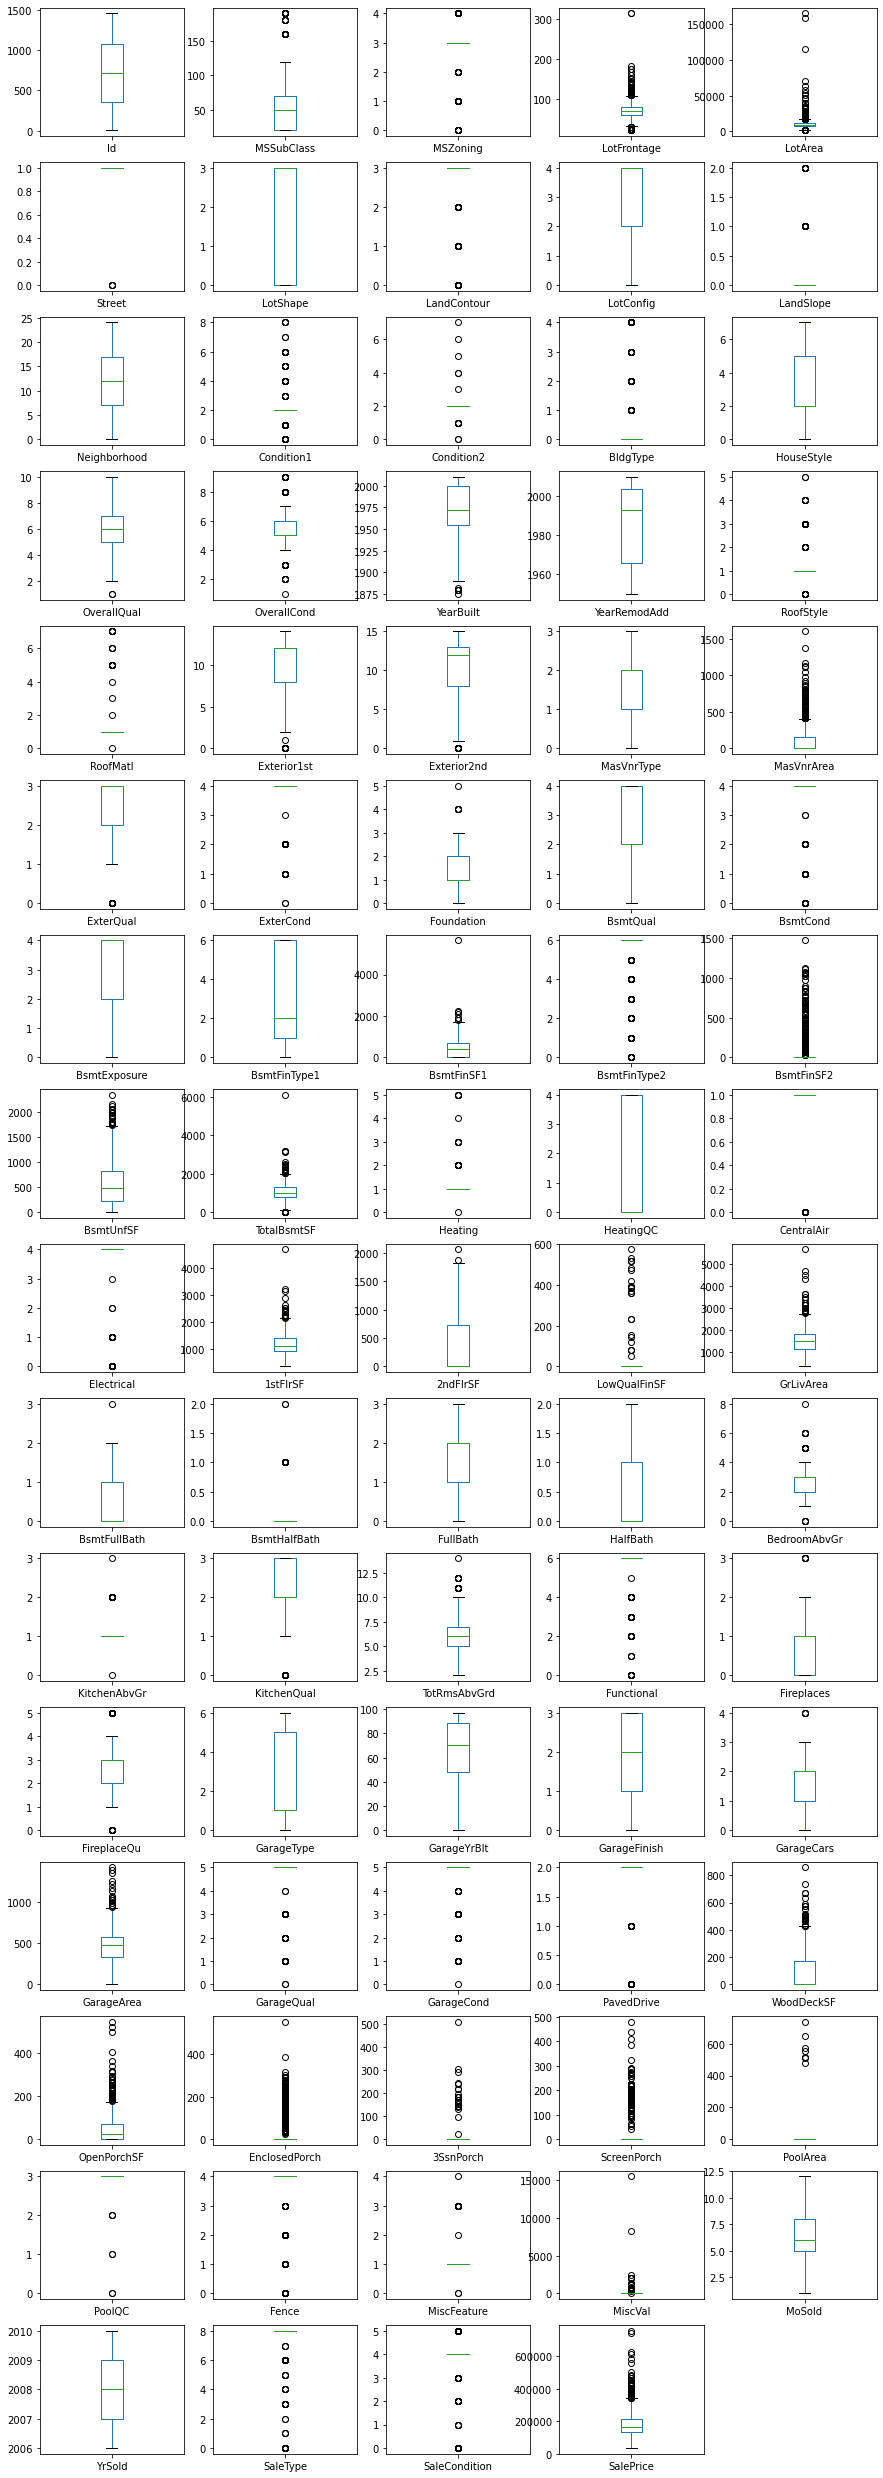

In [151]:
# Checking for the outliers

train_data.plot(kind='box', subplots=True, layout=(16,5), sharex=False, legend=True, figsize=(15,45))
plt.show()

- The dataset contains outliers.

- Taking the threshold value for the skewness as +/-0.5

- We can say that our dataset have skewness.

#### Data Cleaning:

- Removing Outliers using zscore technique:

In [154]:
from scipy.stats import zscore

z = np.abs(zscore(train_data))
z.shape

(1168, 79)

In [155]:
thershold = 6
print(np.where (z>6))

(array([   1,   20,   22,   32,   32,   33,   51,   51,   63,   66,   95,
         98,  103,  103,  103,  113,  113,  119,  119,  141,  141,  141,
        142,  206,  211,  211,  214,  214,  226,  228,  253,  255,  272,
        279,  310,  310,  310,  320,  333,  356,  361,  363,  370,  396,
        418,  429,  441,  441,  443,  463,  478,  481,  488,  493,  500,
        500,  507,  510,  532,  534,  544,  553,  562,  563,  572,  572,
        572,  572,  591,  592,  592,  592,  592,  592,  592,  592,  614,
        614,  637,  639,  652,  686,  689,  689,  691,  691,  699,  713,
        716,  721,  722,  759,  769,  794,  821,  824,  833,  833,  834,
        839,  846,  888,  897,  899,  911,  920,  920,  935,  944,  952,
        952,  956,  961, 1008, 1023, 1038, 1038, 1046, 1047, 1053, 1053,
       1080, 1082, 1094, 1098, 1108, 1120, 1120, 1120, 1120, 1123, 1123,
       1123, 1139, 1142], dtype=int64), array([20, 67, 34, 12, 73, 43, 65, 68, 67, 43, 34, 67, 20, 43, 68,  4,  9,
       2

In [157]:
# Assigning the values to df_new which are less of thershold value and removing the outliers
train_new = train_data[(z<6).all(axis=1)]
print(train_data.shape)
print(train_new.shape)

print ('Shape after removing the outliers is ', train_new.shape)

(1168, 79)
(1069, 79)
Shape after removing the outliers is  (1069, 79)


In [158]:
# Checking percentage of data loss:

loss_per = ((1168-1069)/1168)*100
print ('Percentage of Data Lost is: ',loss_per)

Percentage of Data Lost is:  8.476027397260275


In [161]:
# Dividing the independent and dependent variables

x=train_data.drop('SalePrice',axis=1)
y=train_data['SalePrice']

In [162]:
# Checking for the skewness.

x.skew()

Id                0.026526
MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.732333
LotArea          10.659285
Street          -17.021969
LotShape         -0.603775
LandContour      -3.125982
LotConfig        -1.118821
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
Condition2       11.514458
BldgType          2.318657
HouseStyle        0.285680
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.750566
Exterior2nd      -0.699672
MasVnrType       -0.104609
MasVnrArea        2.834520
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -0.487530
BsmtCond         -2.816444
BsmtExposure     -0.960565
BsmtFinType1      0.100811
BsmtFinSF1        1.871606
BsmtFinType2     -3.144813
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
H

#### Using power_transform function we'll try to remove the skewness from the dataset.

In [163]:
from sklearn.preprocessing import power_transform

x = power_transform(x)
x

array([[-1.54496771,  1.37043472, -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       [ 0.46194084, -1.16799937, -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       [ 0.25422089,  0.4900471 , -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       ...,
       [-1.30033656,  1.70079775, -0.16245555, ...,  0.89957552,
         0.40906852,  0.02973497],
       [-1.97567978,  0.69655685, -2.92646435, ...,  0.14807039,
         0.40906852,  0.02973497],
       [-0.14748082,  0.4900471 , -0.16245555, ..., -1.3590026 ,
         0.40906852,  0.02973497]])

#### Model Building:

In [165]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=95)

#### 1. LinearRegression:

In [168]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression( fit_intercept = True)

LR.fit(x_train, y_train)
print(f"Linear coefficients : {LR.coef_}")
print(f"Intercept : {LR.intercept_}")

Linear coefficients : [ 8.03328015e+02 -1.19340146e+02 -4.37179268e+02 -4.82330058e+02
  5.33507676e+03  1.45874067e+03  1.07144277e+03  2.81630650e+03
 -1.00174878e+03  1.46346716e+03  1.56220891e+03 -2.44967596e+02
 -1.56530022e+03 -4.76366819e+03 -1.56558207e+03  1.62527912e+04
  5.34617811e+03 -1.52133719e+03  2.03824578e+02  6.36276198e+03
  1.29204204e+04 -3.31310097e+02 -2.05575965e+03  8.89946375e+02
  1.59810157e+02 -4.86914853e+03  8.81079125e+02  1.72894848e+03
 -5.18318324e+03 -3.38694984e+02 -4.62829878e+03  1.16696580e+03
  6.45614865e+03 -9.19678376e+03 -9.52719330e+03 -4.00054986e+03
  1.41440436e+04 -1.11943311e+03 -2.24885057e+03  7.81524720e+02
 -1.71043063e+03 -1.30389313e+03 -1.49218814e+02 -2.30666691e+03
  1.71694947e+04  1.62517313e+03 -1.68605436e+03  3.25099799e+03
  5.01700714e+03 -1.63394307e+03 -1.76613177e+03 -5.88504560e+03
  3.37937524e+03  3.24367604e+03  4.17102505e+03 -3.15206622e+03
  2.47775321e+03  3.21989047e+03 -2.70524274e+03  8.83444623e+03
  3

In [169]:
# Predicting the new result

LR_pred = LR.predict(x_test)
LR_pred

array([256716.48107936, 204204.23107936, 109856.16857936, 246401.29357936,
       107879.79357936, 184986.35607936, 337696.35607936, 139660.85607936,
       167618.41857936, 225302.10607936, 186906.79357936, 313815.98107936,
       140021.73107936, 199287.60607936, 195260.48107936,  78335.54357936,
       126657.10607936, 140280.60607936, 317595.85607936, 140201.79357936,
        83317.41857936, 195316.48107936, 168171.04357936, 198882.10607936,
       202724.48107936, 299457.85607936, 117977.48107936, 106937.54357936,
       139954.79357936, 165186.60607936, 228213.16857936,  94140.60607936,
       248583.66857936, 232501.48107936, 196442.85607936, 175321.66857936,
       176085.48107936, 146047.85607936, 242080.48107936, 144043.41857936,
       115072.23107936, 104007.04357936, 266917.35607936, 129103.85607936,
       150529.54357936,  58012.41857936, 329317.73107936, 218173.79357936,
       152245.98107936, 189484.91857936, 238531.54357936, 215465.10607936,
       286204.23107936, 3

#### 2. Lasso

In [175]:
from sklearn.linear_model import Lasso

ls = Lasso()
ls.fit(x_train, y_train)

# Predicting the new results

ls_pred = ls.predict(x_test)
ls_pred

array([256688.08817155, 204223.08659   , 109890.38811304, 246407.94173583,
       107883.22300311, 184983.46133061, 337732.2089803 , 139640.78262227,
       167653.44223094, 225273.71254572, 186903.86792293, 313805.20605809,
       140009.71288715, 199305.45289377, 195258.14272947,  78345.80172911,
       126658.7024441 , 140330.61824404, 317592.78030951, 140199.07543347,
        83326.89017777, 195280.652163  , 168188.21786071, 198854.3630583 ,
       202780.11892162, 299447.88839209, 117983.21397872, 106944.83319864,
       139959.51467239, 165210.80449453, 228238.55930373,  94138.70949859,
       248577.59114329, 232522.80439988, 196442.51447149, 175344.92434395,
       176073.21292545, 146084.07640641, 242039.31062706, 144058.34493572,
       115106.14068428, 104041.26742747, 266912.54877247, 129155.99982369,
       150512.22586034,  58026.86336072, 329300.00986379, 218165.85571348,
       152259.36794295, 189455.87647037, 238506.76817475, 215455.34542988,
       286183.53435009, 3

#### 3. DecisionTreeRegressor:

In [171]:
from sklearn.tree import DecisionTreeRegressor #Importing the library

DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

# Predicting the new result

DT_pred = DT.predict(x_test)
DT_pred

array([175000., 173000., 140000., 203000., 135900., 155000., 246578.,
        89471., 215000., 205000., 206900., 317000., 120500., 201000.,
       138800., 129000., 133000., 123000., 281000., 108000.,  98600.,
       202900., 140000., 172500., 235000., 317000., 135000., 140000.,
       115000., 181000., 227000.,  78000., 236500., 194000., 181000.,
       192000., 172500., 167900., 262280., 133900., 128000., 102000.,
       250000., 141000., 139000.,  92000., 325624., 176000., 136500.,
       200100., 222500., 250580., 311872., 306000., 116050., 236500.,
       139000., 154000., 124900., 120500., 128500., 611657., 185000.,
       167500., 226000., 175000., 132000., 109500., 224000., 155000.,
       123000., 235000., 240000., 108000., 611657., 125000., 260000.,
       154000., 137900., 437154.,  89471.,  82500., 272000., 121600.,
        94000., 128000., 149000., 125000., 175000., 100000., 268000.,
        85400., 142500., 168000., 116500., 129500., 169000., 142500.,
       383970., 2270

#### 4. KNeighborsRegressor:

In [172]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(x_train, y_train)

# Predicting the new result

KNN_pred = KNN.predict(x_test)
KNN_pred

array([497500. , 190637.5, 128500. , 185850. , 108500. , 135250. ,
       332500. , 112950. , 155450. , 196200. , 185250. , 299875. ,
       147250. , 208000. , 509985. , 104500. , 144600. ,  95691.5,
       262050. , 112000. , 103000. , 273900. , 151750. , 254500. ,
       196250. , 305000. , 142000. , 114250. , 113000. , 196000. ,
       293375. , 123500. , 225000. , 238250. , 146950. , 222250. ,
       158500. , 142950. , 145000. , 144750. , 115000. , 135950. ,
       301000. , 133500. , 144250. ,  86000. , 307000. , 210000. ,
       143450. , 146250. , 238250. , 237790. , 214000. , 191495. ,
        95000. , 221500. , 125250. , 155000. , 145000. , 117750. ,
       144450. , 431966.5, 205700. , 165750. , 234750. , 157475. ,
       193125. , 111250. , 218500. , 165500. , 117750. , 331875. ,
       231500. ,  86000. , 503044.5, 118954. , 174700. , 167975. ,
       174000. , 380500. , 126700. , 126450. , 189700. , 153500. ,
        98600. ,  86750. , 160250. , 110750. , 118000. , 10060

#### 5. RandomForestRegressor:

In [173]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_depth=2, random_state=42)

RF.fit(x_train,y_train)

# Predicting the new result

RF_pred = RF.predict(x_test)
RF_pred

array([152018.811756  , 203612.72279716, 143205.2902323 , 205982.26328349,
       143763.05656626, 209563.64111188, 205502.72175165, 150485.11194221,
       163303.81032812, 209537.30656935, 163303.81032812, 274393.6371864 ,
       148900.23334221, 206605.90343334, 150437.75412853, 128827.01487053,
       129961.13870096, 150081.71498632, 280165.71772777, 130411.89347053,
       130764.11164022, 264053.32885347, 133416.24018354, 164774.45722734,
       207448.12727862, 269602.50783888, 141930.58497411, 132727.20324515,
       162003.80344578, 164774.45722734, 262705.55632178, 129230.41182642,
       263860.1437495 , 210773.39263101, 164774.45722734, 205982.26328349,
       164774.45722734, 152800.42171683, 211870.96106693, 144582.71351743,
       162003.80344578, 144535.35570375, 273214.57011654, 129629.98780979,
       131125.93633315, 128827.01487053, 286416.32538585, 206605.90343334,
       148900.23334221, 204198.72499706, 207448.12727862, 205982.26328349,
       212920.09530163, 2

#### Calculating Mean Absolute Error:

In [176]:
from sklearn.metrics import mean_absolute_error

print(' Mean Absolute Error for LinearRegression is ', mean_absolute_error(y_test, LR_pred),
      '\n Mean Absolute Error for the Lasso is ', mean_absolute_error(y_test, ls_pred),
     '\n Mean Absolute Error for DecisionTreeRegressor is ', mean_absolute_error(y_test, DT_pred),
     '\n Mean Absolute Error for KNeighborsRegressor is ', mean_absolute_error(y_test, KNN_pred),
      '\n Mean Absolute Error for RandomForestRegressor is ', mean_absolute_error(y_test, RF_pred))

 Mean Absolute Error for LinearRegression is  22158.142691832993 
 Mean Absolute Error for the Lasso is  22154.59984041892 
 Mean Absolute Error for DecisionTreeRegressor is  25394.410256410258 
 Mean Absolute Error for KNeighborsRegressor is  29492.096153846152 
 Mean Absolute Error for RandomForestRegressor is  30094.539950999737


- We can see that the Mean Absilute error is least for Lasso (22154.599), so this can be considered as good model.
- Also the Mean Absolute Error for LinearRegression is (22158.14), which is almost equal to the Lasso. So, let's check for Root Mean Squared Error and R2_Score to decide the best model.

#### Root Mean Square Error:

In [177]:
from sklearn import metrics

rmse_LR = np.sqrt(metrics.mean_squared_error(y_test, LR_pred))
rmse_ls = np.sqrt(metrics.mean_squared_error(y_test, ls_pred))
rmse_DT = np.sqrt(metrics.mean_squared_error(y_test, DT_pred))
rmse_KNN = np.sqrt(metrics.mean_squared_error(y_test, KNN_pred))
rmse_RF = np.sqrt(metrics.mean_squared_error(y_test, RF_pred))

print('Root Mean Squared Error for LinearRegression is ', rmse_LR)
print('Root Mean Squared Error for Lasso is ', rmse_ls)
print('Root Mean Squared Error for DecisionTreeRegressor is ', rmse_DT)
print('Root Mean Squared Error for KNeighborsRegressor is ', rmse_KNN)
print('Root Mean Squared Error for RandomForestRegressor is ', rmse_RF)

Root Mean Squared Error for LinearRegression is  32900.06525455999
Root Mean Squared Error for Lasso is  32896.55457436603
Root Mean Squared Error for DecisionTreeRegressor is  38982.791146512965
Root Mean Squared Error for KNeighborsRegressor is  54358.71132123481
Root Mean Squared Error for RandomForestRegressor is  44644.049167381185


- We can see that the root mean square error is minimum for Lasso. So, we can say that Lasso is the best fit model. Let's check r2 score for more accurate decision.

#### R-Squared:

In [178]:
from sklearn.metrics import r2_score

print(' R2_Score for LinearRegression is ', r2_score(y_test, LR_pred),
      '\n R2_Score for the Lasso is', r2_score(y_test, ls_pred),
      '\n R2_Score for DecisionTreeRegressor is ', r2_score(y_test, DT_pred),
      '\n R2_Score for KNeighborsRegressor is ', r2_score(y_test, KNN_pred), 
      '\n R2_Score for RandomForestRegressor is ', r2_score(y_test, RF_pred))

 R2_Score for LinearRegression is  0.8419165475343597 
 R2_Score for the Lasso is 0.8419502830805364 
 R2_Score for DecisionTreeRegressor is  0.7780583779481173 
 R2_Score for KNeighborsRegressor is  0.5684499232056501 
 R2_Score for RandomForestRegressor is  0.7089148507145988


- - R2_Score closest to 1.0 is considered as best. From the above observations we can see that the best R2_Score is for LinearRegression and Lasso (0.84). 

- So, as per our observations we can say that the best fit model for our dataset is Lasso.

#### Model Saving:

In [179]:
import pickle
filename = 'housing_price.pkl'
pickle.dump(ls, open(filename, 'wb'))

### Conclusion:

Checking the difference between the Original and Pridicted values

In [180]:
a = np.array(y_test)
predicted = np.array(ls.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

Original      Predicted
0    181000.0  256688.088172
1    176485.0  204223.086590
2    132000.0  109890.388113
3    184000.0  246407.941736
4    107400.0  107883.223003
5    205000.0  184983.461331
6    260000.0  337732.208980
7    116000.0  139640.782622
8    181900.0  167653.442231
9    230000.0  225273.712546
10   158000.0  186903.867923
11   354000.0  313805.206058
12   130000.0  140009.712887
13   214000.0  199305.452894
14   171000.0  195258.142729
15   106500.0   78345.801729
16   124500.0  126658.702444
17   147000.0  140330.618244
18   372500.0  317592.780310
19   102000.0  140199.075433
20    60000.0   83326.890178
21   230000.0  195280.652163
22   179900.0  168188.217861
23   185000.0  198854.363058
24   200000.0  202780.118922
25   281213.0  299447.888392
26   133000.0  117983.213979
27   125000.0  106944.833199
28   128000.0  139959.514672
29   177000.0  165210.804495
30   215000.0  228238.559304
31   101000.0   94138.709499
32   251000.0  248577.591143
33   179900.0  232522.804400
34   185750.0  196442.514471
35   180500.0  175344.924344
36   185000.0  176073.212925
37   163000.0  146084.076406
38   266500.0  242039.310627
39   135000.0  144058.344936
40   104000.0  115106.140684
41   104900.0  104041.267427
42   275500.0  266912.548772
43   160000.0  129155.999824
44   157000.0  150512.225860
45    81000.0   58026.863361
46   350000.0  329300.009864
47   208500.0  218165.855713
48   142000.0  152259.367943
49   161000.0  189455.876470
50   225000.0  238506.768175
51   182000.0  215455.345430
52   335000.0  286183.534350
53   394617.0  343797.486489
54   105500.0  113115.082825
55   278000.0  254682.927777
56   129000.0  144167.962869
57   147500.0  162388.293272
58   139000.0  165453.588511
59   127000.0   90055.686545
60   119900.0  104648.762739
61   485000.0  370135.941903
62   188000.0  205968.047486
63   143000.0  179681.528201
64   235000.0  240855.424117
65   174900.0  163532.679988
66   140000.0  186609.479112
67    87000.0   97820.994673
68   222000.0  241557.270964
69   144000.0  141484.782497
70   100000.0   86550.932158
71   403000.0  295047.979185
72   189000.0  206117.625265
73    75500.0   58308.355015
74   501837.0  373599.518255
75   142000.0  177342.501796
76   241500.0  217949.750459
77   168500.0  234843.201720
78   172000.0  163441.233784
79   451950.0  372324.607827
80   130000.0  125628.177972
81   110000.0  161980.347586
82   240000.0  218305.975876
83   129000.0  102898.587672
84    37900.0   42974.380368
85    88000.0   75238.221841
86   139400.0  120981.616551
87   109900.0  129930.886946
88   137500.0  143254.031764
89    85000.0   94639.192374
90   222000.0  217531.928541
91    75000.0   53096.920177
92   148000.0  138954.287295
93   160000.0  149714.380147
94   129900.0  105642.495332
95   145000.0  124838.719340
96   168000.0  169727.885662
97   135960.0  130319.230484
98   290000.0  252267.608174
99   168000.0  217916.388930
100  128000.0  112542.455523
101  266000.0  265171.795891
102  187500.0  206046.189776
103  107500.0   92911.107812
104  235128.0  245809.585102
105  310000.0  294178.886829
106  194500.0  212063.286132
107  160000.0  142173.251730
108   39300.0   -9798.293333
109  131400.0  146571.327957
110  201800.0  214748.039394
111  193000.0  207449.357478
112  309000.0  296532.631731
113  182900.0  215638.219527
114  127000.0  129741.098674
115  318000.0  272202.443213
116  149350.0  126187.343475
117  181000.0  178565.263339
118  213490.0  196138.308176
119  216000.0  218814.474241
120  157900.0  135377.584043
121  213000.0  219578.381477
122  178400.0  212207.690005
123  124500.0  132600.831008
124  392000.0  259637.982415
125  239000.0  216280.205067
126  133500.0  127107.004218
127  241500.0  219723.255608
128  266000.0  272358.824304
129   79000.0   90527.335583
130  260000.0  255858.597662
131  131000.0  123293.725911
132  209500.0  218956.369059
133  144000.0  149075.928667
134  195000.0  193147.854882
135  114500.0  115515.531519
136  112000.0   65569.119764
137

<AxesSubplot:ylabel='Density'>

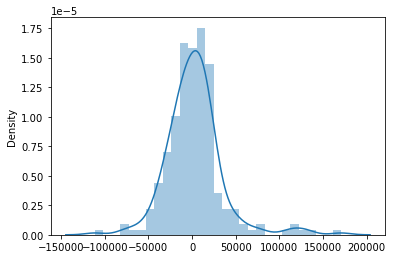

In [182]:
sns.distplot(a-predicted)

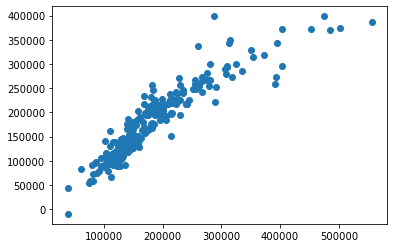

In [183]:
# We are getting an almost normal distribution in our predicted values
plt.scatter(a,predicted)